# Project in Descriptive Text Mining by Jip Maijers

### This project is based on a lab by Gianluca Moro (gianluca.moro@unibo.it).

### Contact details: 
### jip.maijers@studio.unibo.it


### R Script of the lab on LSA applied to Skytrax reviews of airports dataset
### Goal: explaining what makes airport customers like an airport by processing their reviews



### dataset: https://github.com/quankiquanki/skytrax-reviews-dataset/blob/master/data/airport.csv



In [1]:
install.packages("lsa")
install.packages("tm")
install.packages("RWeka")
library(tm)
library(lsa)
library(RWeka)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘SnowballC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RWekajars’, ‘rJava’


Loading required package: NLP

Loading required package: SnowballC



In [2]:
# set the working directory  
# setwd("~/") 

#Download the dataset. This dataset includes airport reviews combined with a
#numerical rating of the aiport by the user who left the review.    
download.file('https://raw.githubusercontent.com/quankiquanki/skytrax-reviews-dataset/master/data/airport.csv', 'airports.csv') #, method="curl")

# load the  file to explore reviews
airports <- read.csv("airports.csv")

# save a copy in csv format
write.csv(airports, file = "airports-reviews.csv", col.names = TRUE, row.names = FALSE)



Warning message in write.csv(airports, file = "airports-reviews.csv", col.names = TRUE, :
“attempt to set 'col.names' ignored”


In [3]:
# display the first 10 reviews
head(airports, 10)

airport_name    link                            
1  aalborg-airport /airport-reviews/aalborg-airport
2  aalborg-airport /airport-reviews/aalborg-airport
3  aalborg-airport /airport-reviews/aalborg-airport
4  aalborg-airport /airport-reviews/aalborg-airport
5  aalborg-airport /airport-reviews/aalborg-airport
6  aalborg-airport /airport-reviews/aalborg-airport
7  aalborg-airport /airport-reviews/aalborg-airport
8  aalborg-airport /airport-reviews/aalborg-airport
9  aalborg-airport /airport-reviews/aalborg-airport
10 aalborg-airport /airport-reviews/aalborg-airport
   title                           author          author_country date      
1  Aalborg Airport customer review Klaus Malling   Denmark        2014-02-11
2  Aalborg Airport customer review S Kroes         Netherlands    2013-02-13
3  Aalborg Airport customer review M Andersen      Denmark        2012-08-07
4  Aalborg Airport customer review Paul Van Alsten France         2011-05-22
5  Aalborg Airport customer review K Fischer                      2010-08-04
6  Aalborg Airport customer review M Larsen                       2009-03-26
7  Aalborg Airport customer review J Plum                         2008-06-12
8  Aalborg Airport customer review P Panagopoulos                 2008-06-10
9  Aalborg Airport customer review Pedro Gil                      2005-08-28
10 Aalborg Airport customer review Kent C Cooper                  2004-02-17
   content                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
1  A small very effective airport with few flights. Check-in is notorious quick and staff friendly arrival very quick and busses to Aalborg frequent. Usually no problems getting taxis as well. There used to be a cafeteria but nowadays just a kiosk - but good cafeteria with reasonable prizes inside terminal. Security check quick and friendly as well. There is a nice viewing pavilion at one end of the airport. Outside note the famous "kiss and goodbye signs". Restrooms outside terminal however few.                                                                                                                                                                                                                                                                                                                                                                       
2  This is a nice and modern airport at the moment they are expanding the airport so there is a lot of building going on but in the departure area you will not notice this very much. The Airport has got free Wifi and a small restaurant with shop on the land side. Airside you will find a small shop with pre-packed sandwiches and hot dogs and other small stuff a small duty free shop is also around but not very cheap. There is no Lounge to be found at the moment but after the expansion is completed there will be one available (around May 2013). Check-in procedures are fast and the waiting area after check-in is fine with a view on the tarmac. All in all a nice modern but small airport with expensive restaurants and shop.                                                                                                                                     
3

In [4]:
# save in the vector contents the contents of each airport review
contents <- airports$content; 

# save each rating  in the vector ratings
ratings <- airports$overall_rating



#remove cobinations with No overall rating
frame <- data.frame(contents, ratings)
frame <- frame[complete.cases(frame), ]
nrow(frame)
#check if removal was succesfull
head(frame, 10)

[1] 13796

contents                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
1  A small very effective airport with few flights. Check-in is notorious quick and staff friendly arrival very quick and busses to Aalborg frequent. Usually no problems getting taxis as well. There used to be a cafeteria but nowadays just a kiosk - but good cafeteria with reasonable prizes inside terminal. Security check quick and friendly as well. There is a nice viewing pavilion at one end of the airport. Outside note the famous "kiss and goodbye signs". Restrooms outside terminal however few.                                                                                                                                                                                                                                  
2  This is a nice and modern airport at the moment they are expanding the airport so there is a lot of building going on but in the departure area you will not notice this very much. The Airport has got free Wifi and a small restaurant with shop on the land side. Airside you will find a small shop with pre-packed sandwiches and hot dogs and other small stuff a small duty free shop is also around but not very cheap. There is no Lounge to be found at the moment but after the expansion is completed there will be one available (around May 2013). Check-in procedures are fast and the waiting area after check-in is fine with a view on the tarmac. All in all a nice modern but small airport with expensive restaurants and shop.
3  A very nice airy terminal - that seems modern enough. Free WIFI and free parking. Everything within walking distance. Most people travel domestic to Copenhagen but a rising number of international routes e.g. AAL-AMS makes for a lot of possibilities. Check-in is very quick and so is Security. All in all a nice experience.                                                                                                                                                                                                                                                                                                                                                                                                                 
4  AMS-AAL and quite satisfied with this regional airport. Only a few flights per day so baggage reclaim understandably very quick. Bus line 2 connects with downtown Aalborg every 15 minutes weekdays but only hourly during the weekend - travel time is 15 mins and costs 18DKK. Check-in efficient and hassle-free using self-service kiosks. Free Internet computers are available landside - a nice touch. Security staff very friendly. Boarding area is rather cramped with limited seating - do not go airside too early.                                                                                                                                                                                                                    
5  Very quick check-inn and security screening. Nice and airy. Free parking! No need to show up at the airport very early as is the case in CPH. Only drawback is that after security you will be standing and waiting for the gate to open. There is is very little space here and no where to sit down.                                                                  

In [5]:
#re-separate vectors
contents <- frame$contents
ratings <- frame$ratings 

In [6]:
#normalize labels to 3 categories: poor (<5), average (5=>x<7), good (>=7)
ratings_norm <- c()
for(i in 1:length(ratings)){
  if(ratings[i] <=4){
    ratings_norm <- append(ratings_norm, "Poor")
  }
  else if (ratings[i] <=7){
    ratings_norm <- append(ratings_norm, "Average")
  }
  else if (ratings[i] >=8){
    ratings_norm <-append(ratings_norm, "Good")
  }
  
}


In [7]:
#print head to check if normalisation went well
head(ratings_norm, 10)

[1] "Good"    "Good"    "Good"    "Average" "Poor"    "Average" "Poor"   
 [8] "Poor"    "Poor"    "Good"

#We create a corpus and perform text preprocessing actions#

In [8]:
corpus <- Corpus(VectorSource(contents))

In [9]:
inspect(corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] A small very effective airport with few flights. Check-in is notorious quick and staff friendly arrival very quick and busses to Aalborg frequent. Usually no problems getting taxis as well. There used to be a cafeteria but nowadays just a kiosk - but good cafeteria with reasonable prizes inside terminal. Security check quick and friendly as well. There is a nice viewing pavilion at one end of the airport. Outside note the famous "kiss and goodbye signs". Restrooms outside terminal however few.                                                                                                                                                                                                                                  
[2] This is a nice and modern airport at the moment they are expanding the airport so there is a lot of building going on but in the departure area you will not notice thi

In [10]:
#Preprocessing
corpus <- tm_map(corpus, tolower)
corpus <- tm_map(corpus, removeWords, stopwords_en)
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeWords, stopwords_en)
tdmc <- TermDocumentMatrix(corpus)

Warning message in tm_map.SimpleCorpus(corpus, tolower):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords_en):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords_en):
“transformation drops documents”


In [11]:
inspect(tdmc)

<<TermDocumentMatrix (terms: 23995, documents: 13796)>>
Non-/sparse entries: 546359/330488661
Sparsity           : 100%
Maximal term length: 37
Weighting          : term frequency (tf)
Sample             :
             Docs
Terms         1556 2465 2531 2740 3501 4889 6311 8655 9206 9975
  airport        2    8    6    6    3    5    4    7    6   12
  check          1    0    5    6    2    4    1    0    0    4
  flight         2    8    3    0    5    1    2    0    1    1
  immigration    0    0    2    0    2    6    3    2    0    0
  minutes        0    6    0    1    0    4    3    1    0    1
  people         0    1    0    2    5    2    4    1    0    1
  security       2    8    4    3    1    6    4    4    2    5
  staff          0    0    0    1    0    2    1    0    1    0
  terminal       7    3    5    1    0    1    2    8    3    2
  time           3    5    0    1    4    1    3    1    4    2


We remove terms that appear too infrequently

In [12]:
tdms <- removeSparseTerms(tdmc, 0.975)

In [13]:
inspect(tdms)

<<TermDocumentMatrix (terms: 274, documents: 13796)>>
Non-/sparse entries: 251379/3528725
Sparsity           : 93%
Maximal term length: 13
Weighting          : term frequency (tf)
Sample             :
             Docs
Terms         144 2465 2531 2740 3501 3502 4889 6311 7347 9206
  airport       7    8    6    6    3    4    5    4    1    6
  check         2    0    5    6    2    5    4    1    2    0
  flight        0    8    3    0    5    4    1    2    0    1
  immigration   3    0    2    0    2    1    6    3    0    0
  minutes       1    6    0    1    0    4    4    3    0    0
  people        1    1    0    2    5    2    2    4    1    0
  security      3    8    4    3    1    2    6    4    1    2
  staff         1    0    0    1    0    1    2    1    6    1
  terminal      2    3    5    1    0    0    1    2    7    3
  time          3    5    0    1    4    0    1    3    2    4


In [14]:
words <- rownames(tdms)

In [15]:
tdm <- as.matrix(tdms)

In [16]:
# load of the terms docs matrix with 13796 airport reviews
colnames(tdm) <- 1:13796 # set the name of each doc with its id corresponding to its matrix position
words <- rownames(tdm) # dictionary extraction 
# how many words ?
length(words)

[1] 274

#Creation of the Latent Space#

In [17]:
# application of the term weighting TF-IDF to the terms-docs matrix
tdmle <- lw_logtf(tdm) * ( 1-entropy(tdm) )  
head(tdmle)

1          2          3          4          5          6         
airport  0.05584499 0.08181143 0.00000000 0.03523427 0.03523427 0.03523427
arrival  0.14658812 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
check    0.15494066 0.15494066 0.09775667 0.09775667 0.00000000 0.09775667
flights  0.13645344 0.00000000 0.00000000 0.13645344 0.00000000 0.00000000
friendly 0.25901518 0.00000000 0.00000000 0.16342038 0.00000000 0.16342038
getting  0.19973172 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
         7          8          9          10         ⋯ 13787 13788     
airport  0.03523427 0.05584499 0.05584499 0.03523427 ⋯ 0     0.03523427
arrival  0.00000000 0.00000000 0.00000000 0.14658812 ⋯ 0     0.00000000
check    0.00000000 0.00000000 0.00000000 0.00000000 ⋯ 0     0.00000000
flights  0.00000000 0.00000000 0.00000000 0.00000000 ⋯ 0     0.00000000
friendly 0.00000000 0.00000000 0.00000000 0.00000000 ⋯ 0     0.00000000
getting  0.00000000 0.00000000 0.00000000 0.00000000 ⋯ 0     0.00000000
         13789      13790      13791      13792     13793      13794     
airport  0.00000000 0.03523427 0.07046853 0.0000000 0.05584499 0.05584499
arrival  0.00000000 0.00000000 0.14658812 0.0000000 0.00000000 0.00000000
check    0.09775667 0.00000000 0.00000000 0.0000000 0.00000000 0.00000000
flights  0.00000000 0.00000000 0.21627358 0.2162736 0.00000000 0.00000000
friendly 0.00000000 0.00000000 0.00000000 0.0000000 0.00000000 0.00000000
getting  0.00000000 0.00000000 0.00000000 0.0000000 0.00000000 0.00000000
         13795      13796     
airport  0.03523427 0.05584499
arrival  0.00000000 0.00000000
check    0.00000000 0.00000000
flights  0.00000000 0.00000000
friendly 0.16342038 0.00000000
getting  0.00000000 0.00000000

In [18]:
# with this function we compute the norm of a vector
norm_vec <- function(x) sqrt(sum(x^2))

# we use is to compute the norm of each term in the terms-docs matrix 
term_norms <- apply(tdmle, 1, norm_vec)

# LSA space creation with rank automatically choosen by R
lsar <- lsa( tdmle ) 

# how many eigenvalues have been computed ? 
length(lsar$sk)

[1] 115

In [19]:
# display the 3 matrices of the SVD decomposition: U S V^t
# U is named tk (lsar$tk), S is sk (lsar$sk), V is dk (lsar$dk)
head(lsar)

$tk
                     [,1]          [,2]          [,3]          [,4]
airport       -0.12637812 -0.0687852588  1.639427e-02 -1.001200e-02
arrival       -0.10045159 -0.0204319515 -7.971119e-02  3.382947e-02
check         -0.15341345  0.0043273423 -5.958803e-02  1.389758e-01
flights       -0.11102043  0.0359891295  8.912399e-02 -5.063542e-02
friendly      -0.06467108 -0.1031401564  2.297201e-02  4.897036e-02
getting       -0.06078323  0.0223444825 -3.002006e-02 -3.513844e-02
inside        -0.04247350 -0.0269164890 -8.470114e-03 -3.136806e-02
nice          -0.06449594 -0.1093058709  2.925822e-02  2.975825e-02
outside       -0.06287732 -0.0337391499 -4.823662e-02 -5.148832e-02
quick         -0.07045716 -0.0603691913 -6.076835e-02  4.436531e-02
reasonable    -0.03258833 -0.0383098286 -2.665609e-02  1.519690e-02
security      -0.14999315 -0.0006938482 -4.934140e-04  7.246166e-02
signs         -0.04889130 -0.0052496788  1.266942e-02 -6.403292e-02
staff         -0.12151269 -0.0123282832  4.978323e-02  9.435866e-02
terminal      -0.17261483 -0.1344493848  6.740405e-02 -1.682755e-01
usually       -0.04090869 -0.0408177029  3.777547e-03 -1.199503e-02
airside       -0.05082715 -0.0800445965 -3.503846e-02  2.718796e-02
available     -0.05730513 -0.0521572056  6.178607e-03  2.527415e-02
building      -0.06076229 -0.0554771832 -7.387896e-02 -5.240388e-02
departure     -0.12490248 -0.0200014347 -9.157272e-02  1.184136e-01
duty          -0.07584543 -0.1054708552 -4.440575e-02  1.940837e-01
expensive     -0.05140387 -0.0898994587 -3.579836e-02  2.620994e-02
fast          -0.06497150 -0.0634981951  4.701837e-03  3.280608e-02
fine          -0.03903645 -0.0124631282 -1.703551e-02 -4.624567e-03
found         -0.06545095 -0.0088654496  2.130979e-02  6.395536e-03
free          -0.09814260 -0.1712064204 -5.318235e-02  1.679889e-01
lot           -0.05978073 -0.0449499323  2.488874e-03 -9.139924e-03
lounge        -0.08649131 -0.0764633628 -3.587032e-03  1.152173e-01
modern        -0.04451766 -0.1016668856  2.323722e-02  1.989856e-02
restaurant    -0.02658308 -0.0487474177  3.991955e-03  1.463263e-02
restaurants   -0.04582440 -0.1006516011  3.087979e-02  2.365747e-02
shop          -0.04718404 -0.0661596095 -3.894538e-02  9.275842e-02
waiting       -0.08870472  0.0566775054 -1.882101e-02 -1.461703e-02
wifi          -0.04546396 -0.1014146163  3.675038e-02  6.700198e-02
domestic      -0.07428750 -0.0716573581  1.913356e-01 -1.490198e-01
experience    -0.09425221  0.0126207824  1.106873e-03  2.122423e-02
international -0.10472382 -0.0847135657  2.271836e-01 -1.068730e-01
makes         -0.02697153 -0.0150631470  1.553823e-02 -2.114052e-02
parking       -0.04685427 -0.0571145595 -1.654015e-01 -1.842721e-01
people        -0.11914911  0.1501458456  1.673112e-02  3.479001e-02
travel        -0.05008533 -0.0082367576  3.042494e-02 -2.658488e-02
walking       -0.03866893 -0.0189961135 -6.286246e-03 -3.561726e-02
baggage       -0.11287488  0.0394412979 -6.487193e-02 -9.055606e-02
boarding      -0.09868434  0.0746183014  5.057422e-02  1.020253e-01
bus           -0.09427205 -0.0402674472 -7.531827e-02 -2.689767e-01
day           -0.04920539  0.0185181310 -1.506826e-02 -2.786580e-02
efficient     -0.06734756 -0.1010270998 -1.176944e-02  4.313610e-02
limited       -0.04820613 -0.0924128546  1.025699e-02  3.250054e-02
line          -0.09895161  0.2047789461  1.743131e-01 -2.741637e-02
mins          -0.06315134  0.0640678805 -6.034568e-02 -3.485313e-02
minutes       -0.13495464  0.1240947032 -7.119750e-02 -6.354653e-02
seating       -0.06469727 -0.0964918701 -4.757482e-02  7.698476e-02
time          -0.14138772  0.0791381636  2.285771e-02 -1.354266e-02
using         -0.04452685 -0.0228862832 -2.332035e-02 -3.715316e-02
gate          -0.12768417  0.0727727273  5.060355e-02  3.089581e-02
little        -0.06074335 -0.0456300783 -2.296777e-02  1.205278e-02
sit           -0.03660311 -0.0044629491  1.113613e-02  2.384418e-02
space         -0.04393713 -0.0382480158 -2.618926e-0

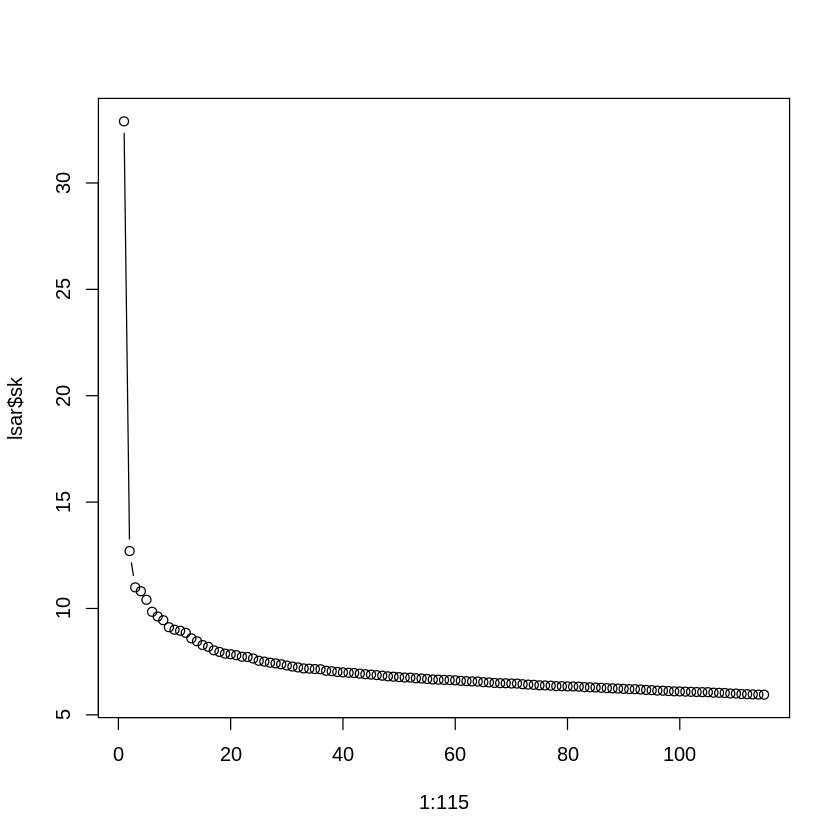

In [20]:
# graphs of the eigenvalues computed by the SVD 
plot( 1:115, lsar$sk, type="b" )

In [21]:
# let's compute the two weighted matrices, terms and docs, of semantic similarity by the eigenvalues
tls <- lsar$tk %*% diag( lsar$sk )
dls <- lsar$dk %*% diag( lsar$sk )

In [22]:
# compute the norm of each term 
term_norms_lsa <- apply(tls, 1, norm_vec)
# add the column of the norms to the matrix tls, we need this in the next operations
tls_term_norms = cbind(tls, term_norms_lsa)

If we keep using the first latent dimension for the space we get too much of a skew in our terms and documents, hence we will use the second and third

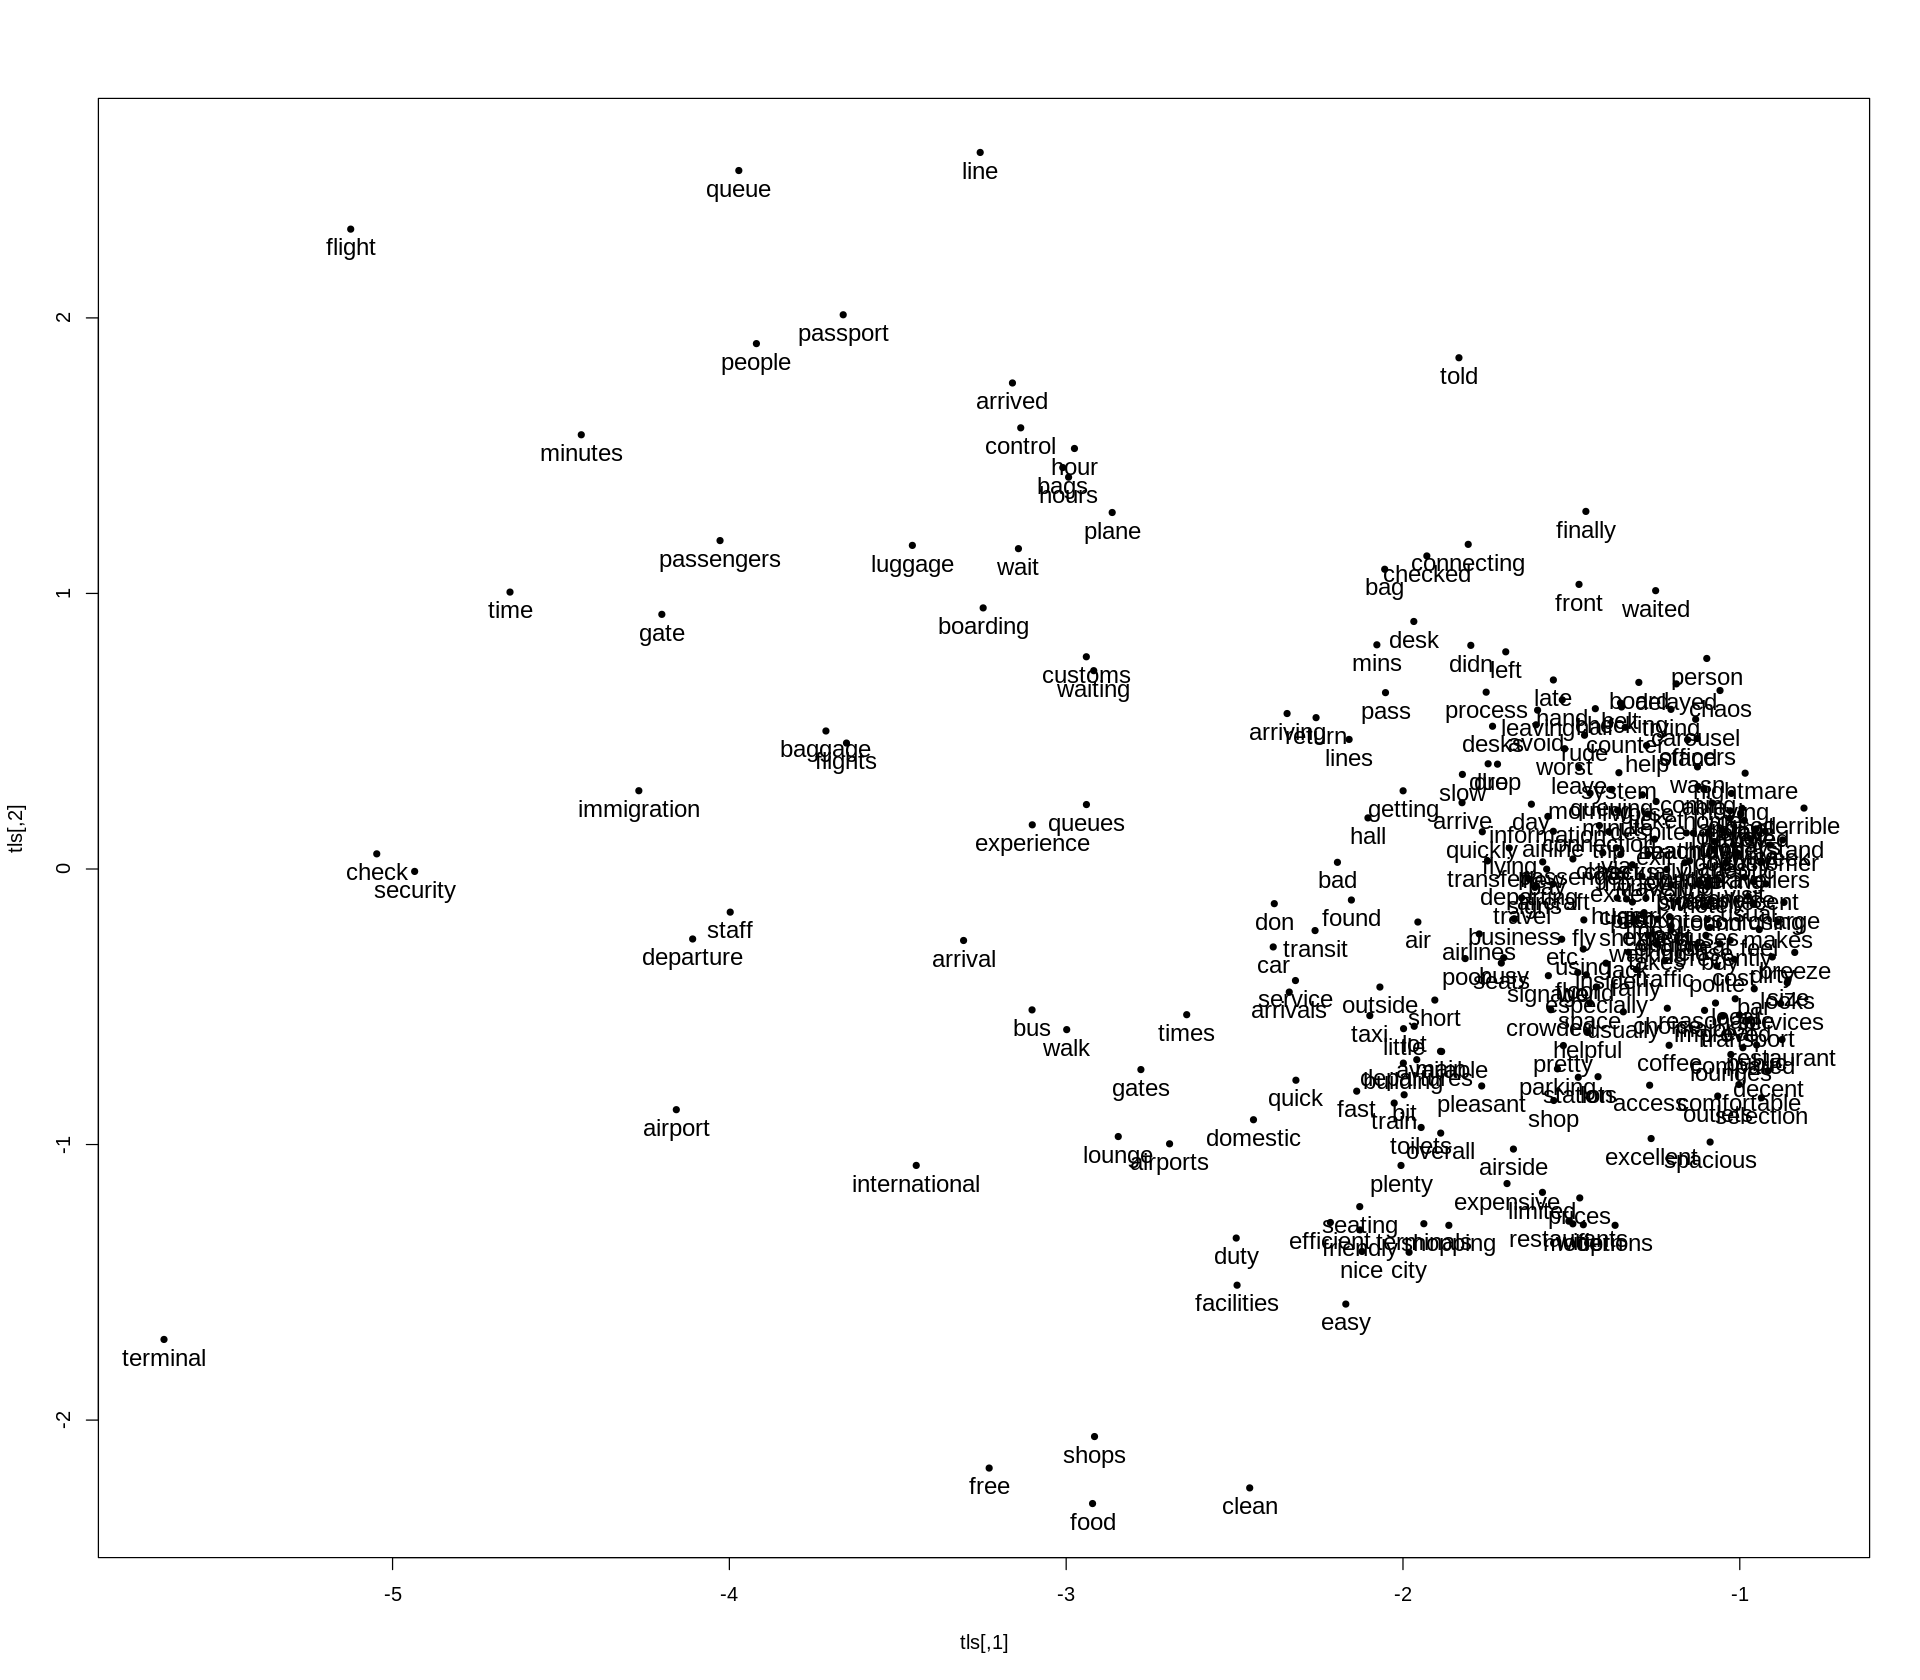

In [23]:
# graphic representation of terms using the first two latent dimensions
options(repr.plot.width=16, repr.plot.height=14)
plot( tls, pch=20 )
text( tls, labels=words, cex=1.2, pos=1 )
## to save the picture and change its dimension uncomment dev.off() and png

In [24]:
# subset of terms with norm > 1.25 (the 116 column contains the norms)
tls_reduced <- subset(tls_term_norms, term_norms_lsa > 1.25)[,-116]

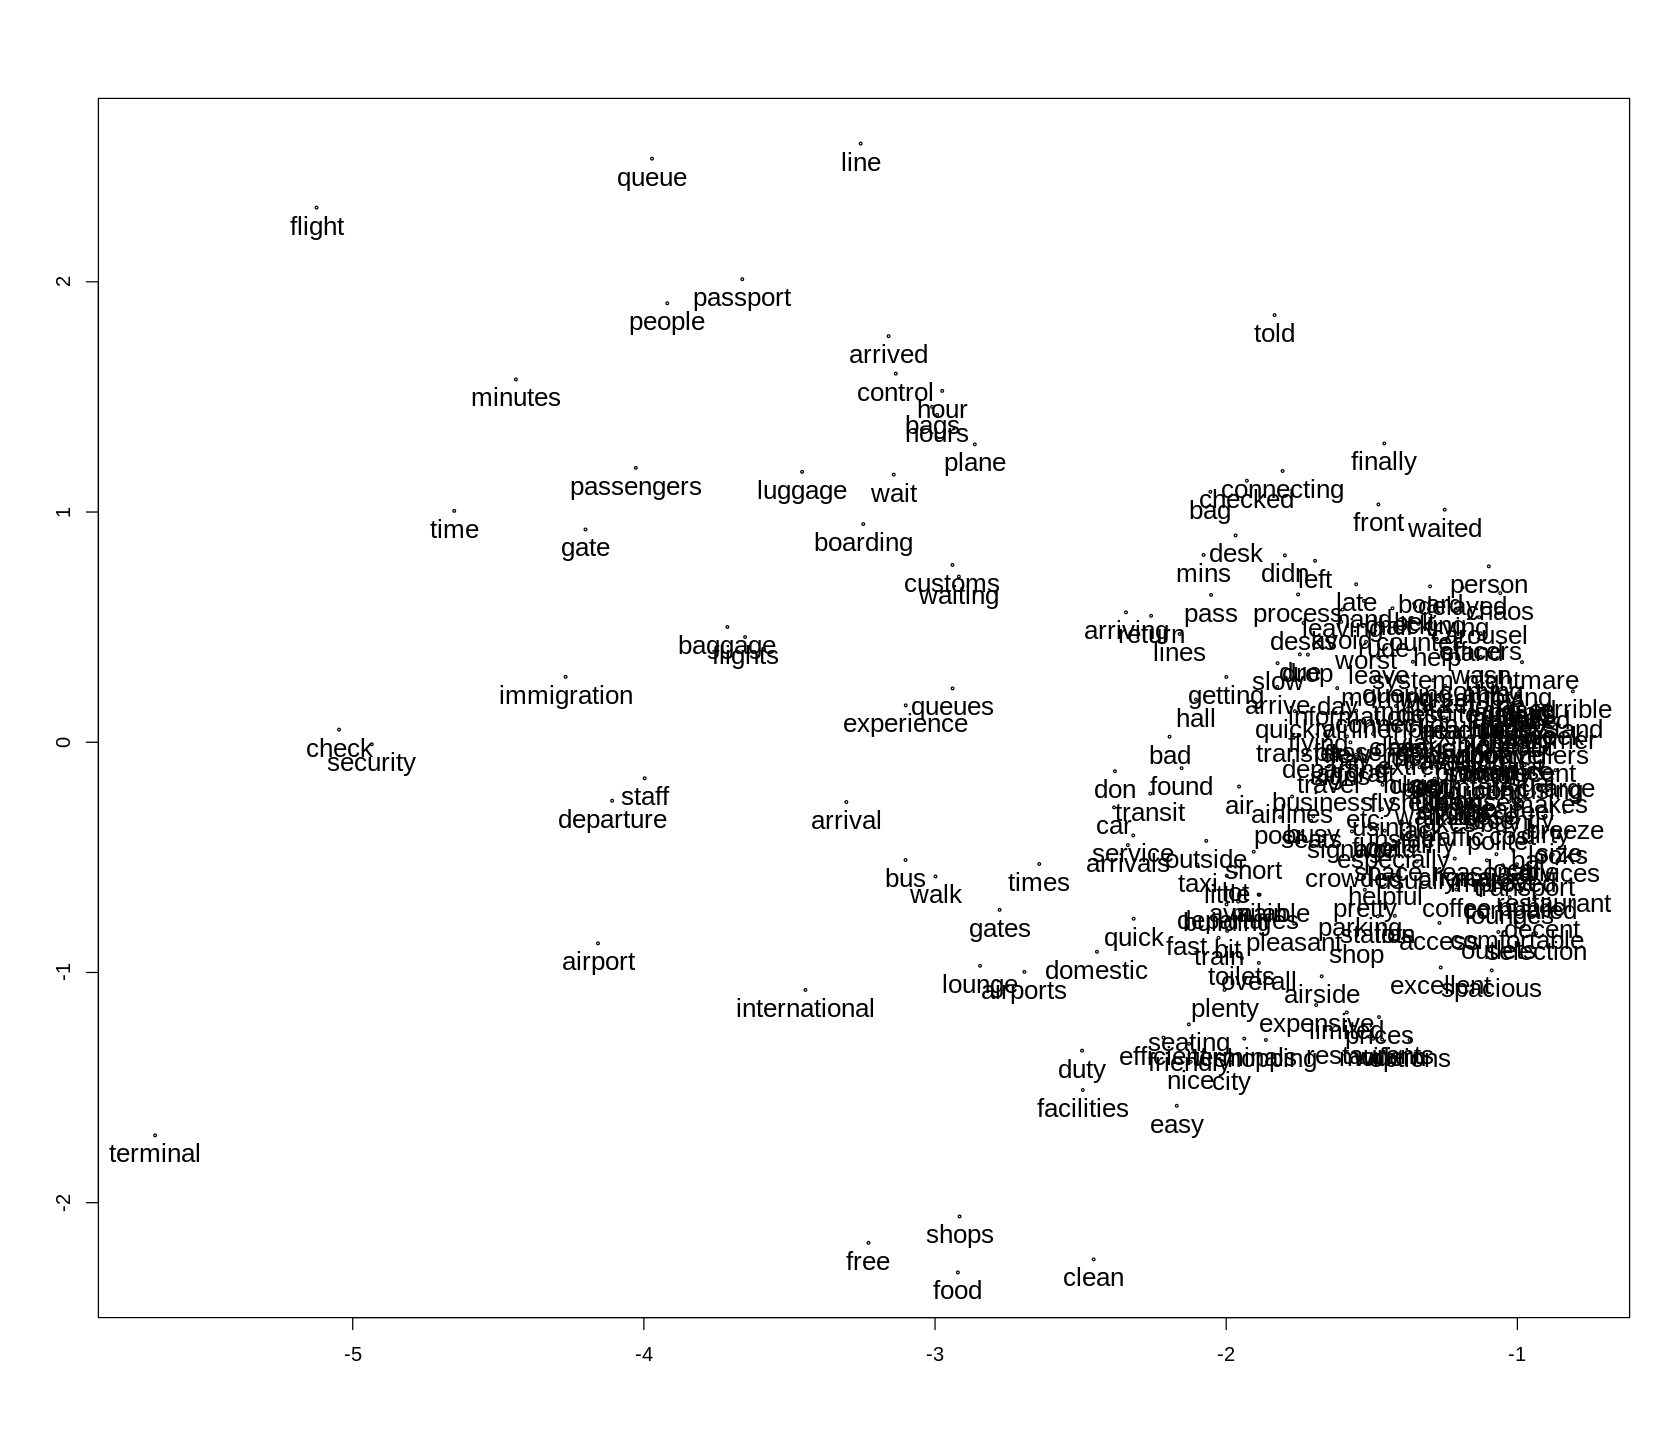

In [25]:
# representation of this terms subset using the first two latent dimensions
#png("termini-doc-ridotto.png", width=800, height=700)
options(repr.plot.width=14, repr.plot.height=12)
plot( tls_reduced, pch=21, cex=0.3 )
text( tls_reduced, labels=words, cex=1.3, pos=1 )
#dev.off()

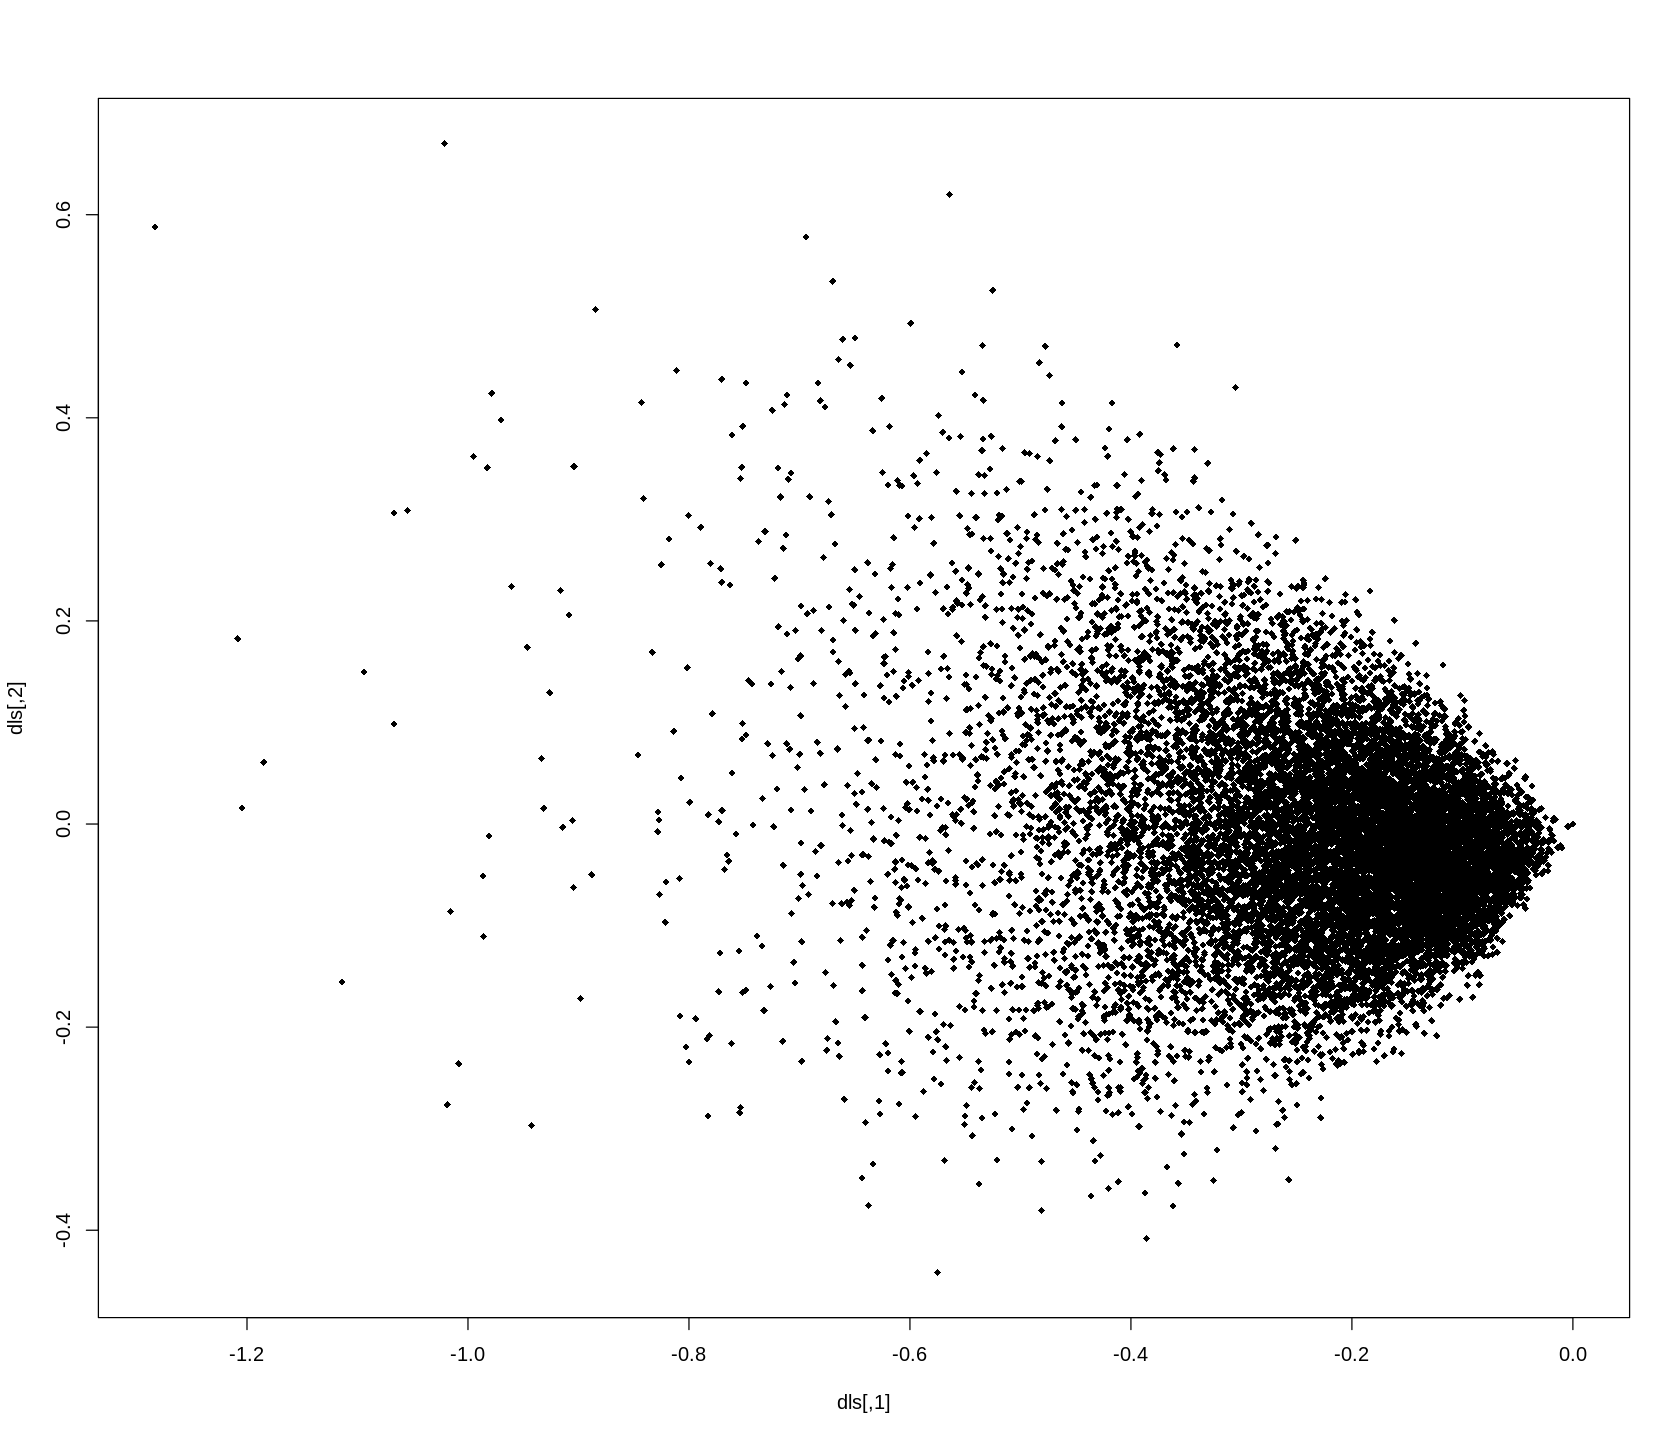

In [26]:
# graph of the documents using the first two latent dimensions
plot( dls, pch=18, cex=0.8 )

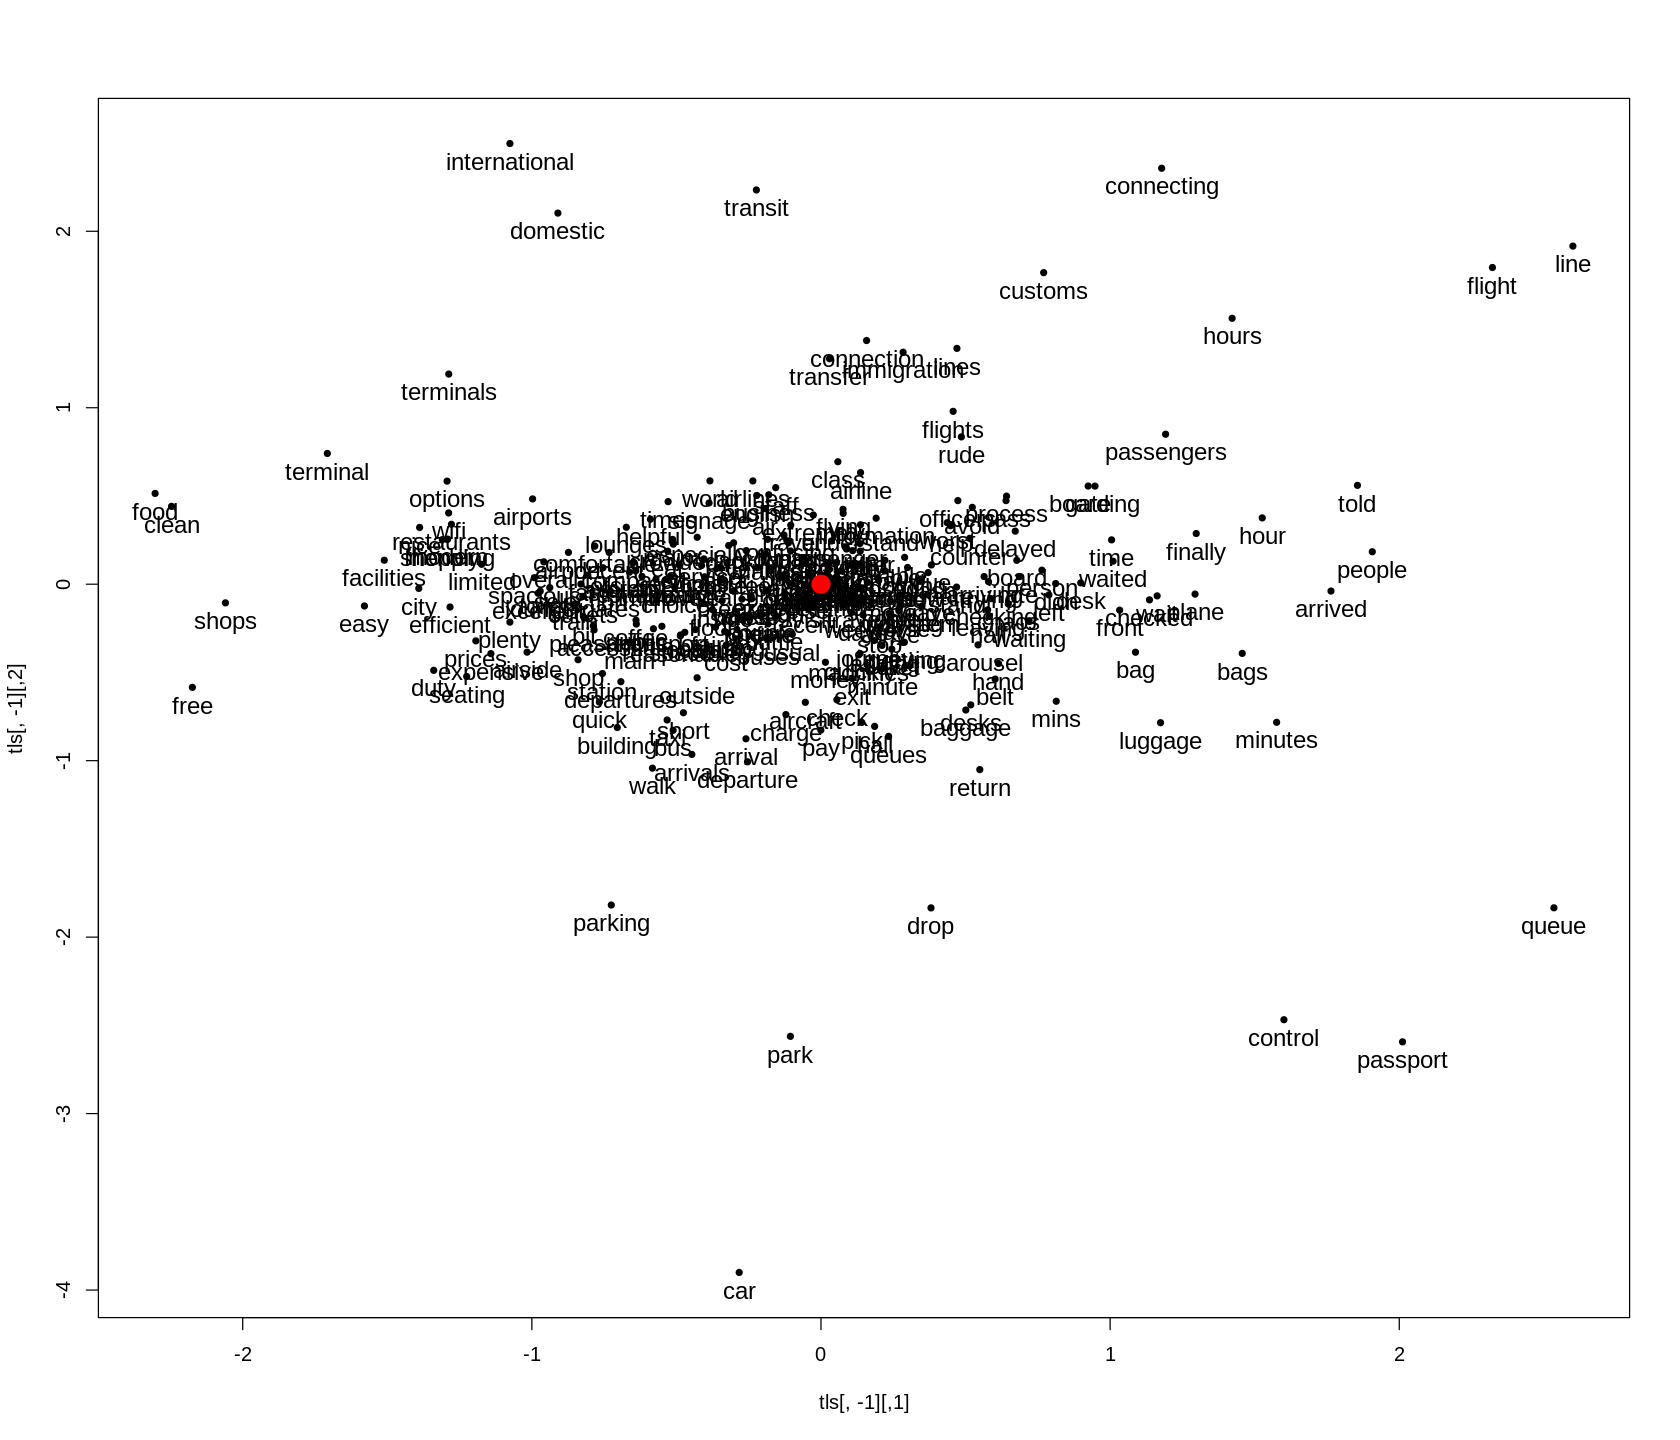

In [27]:
# graph representation of the terms using the second and third latent variables
#png("termini-doc-dim-2-3.png", width=800, height=700)
options(repr.plot.width=14, repr.plot.height=12)
plot( tls[,-1], pch=20 ) # -1 removes the first latent dimensions in order to display 2° and 3°
text( tls[,-1], labels=words, cex=1.2, pos=1 )
points( 0, 0, pch=20, cex=3, col="red" ) # draw the origin 0,0 of the cartesian plane
#dev.off()

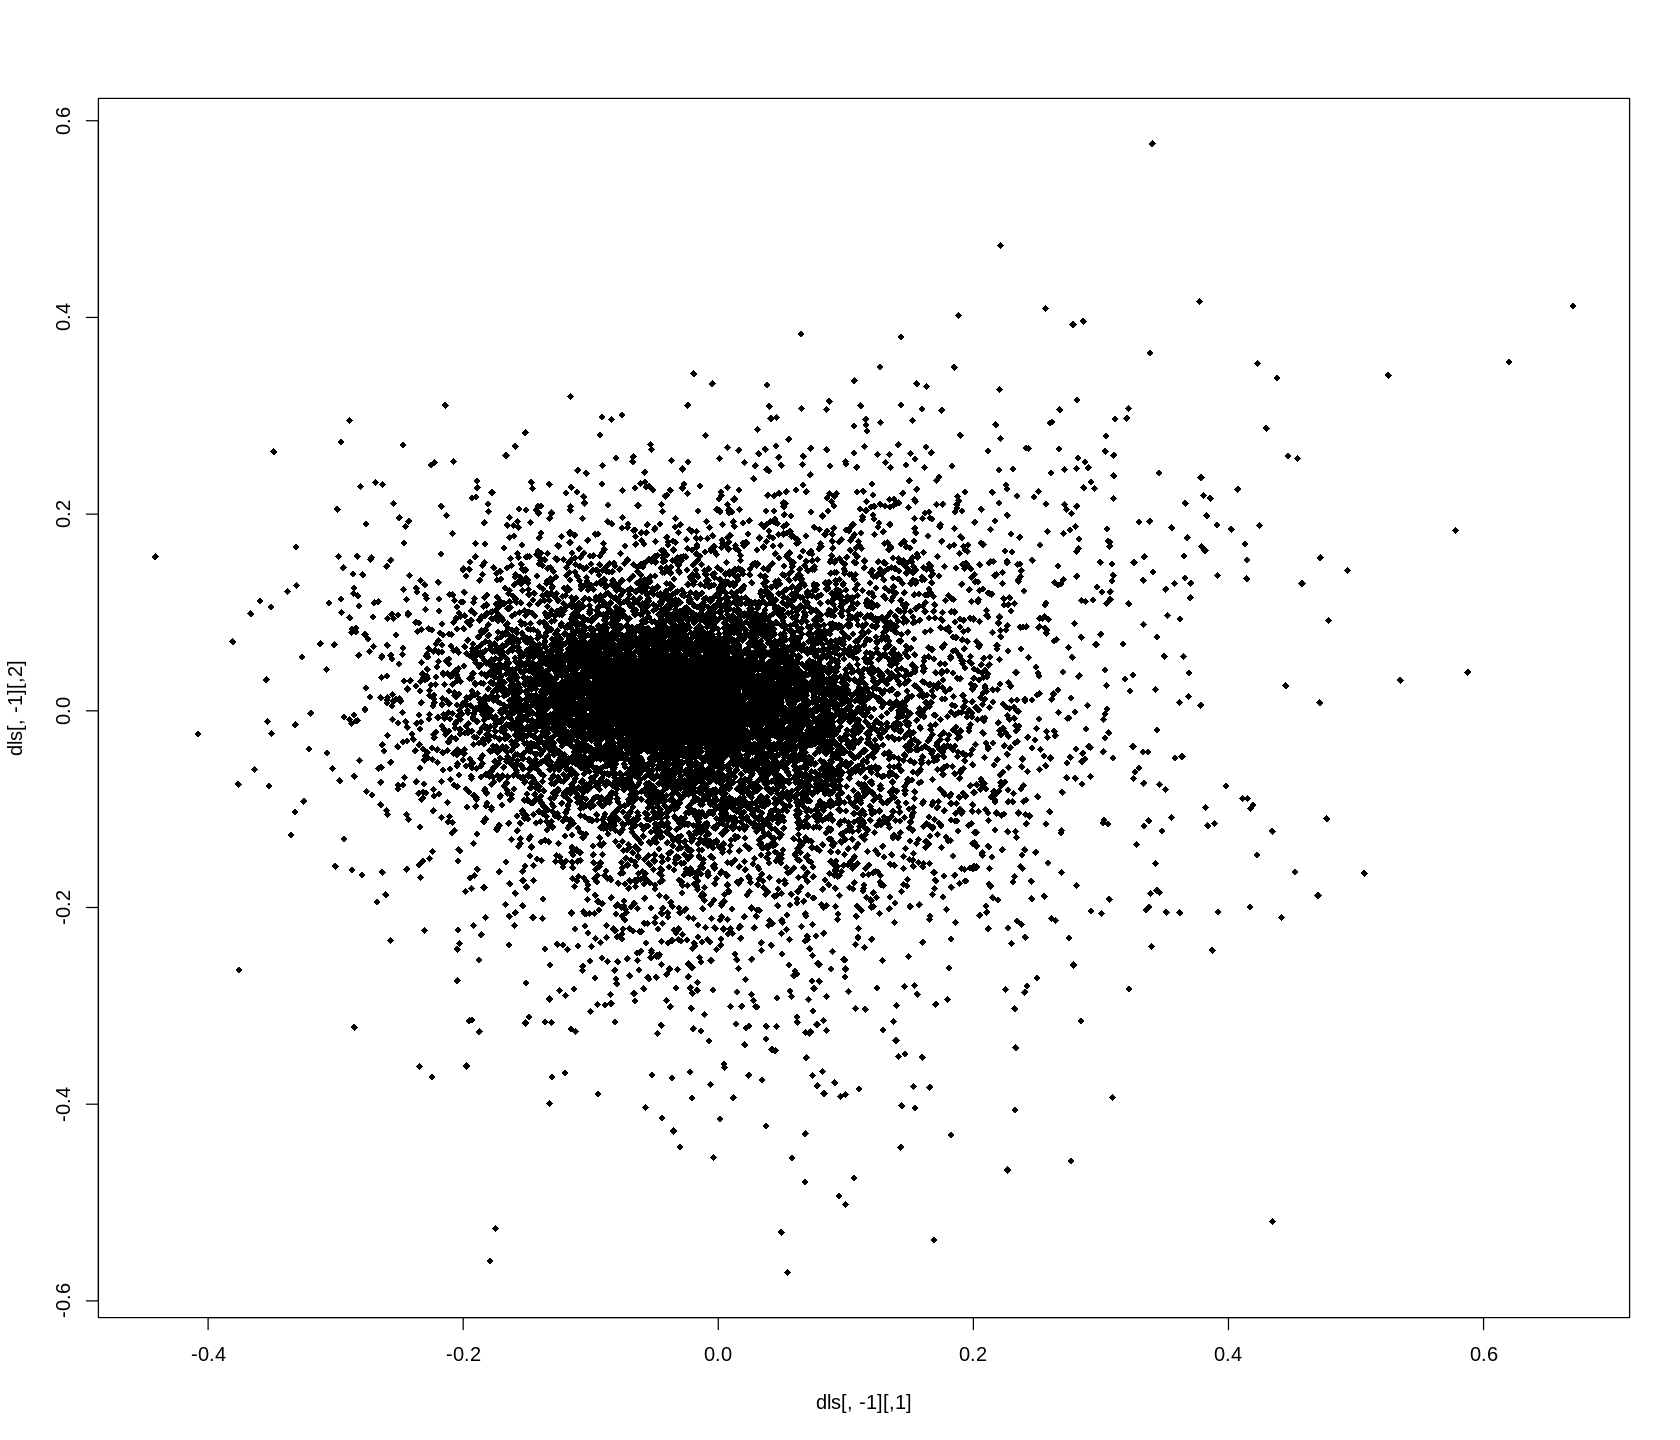

In [28]:
# graph of docs using 2° and 3° latent dimensions
plot( dls[,-1], pch=18, cex=0.8 )

In [29]:
install.packages('dplyr')
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [30]:
# conversion of the class names to colors in order to distinguish in the graph the categorical rating
ratingcols = as.vector(recode(ratings_norm, "Poor" = "red", "Average" = "blue",  "Good" = "green"))
head(ratingcols)
head(ratingcols)

[1] "green" "green" "green" "blue"  "red"   "blue"

[1] "green" "green" "green" "blue"  "red"   "blue"

we have a lot of poor reviews, this will become important later in interpreting the results of this project

In [31]:
summary(as.factor(ratings_norm))

Average    Good    Poor 
   2728    2493    8575

In [32]:
#show percentage of positive reviews
2493/13796

[1] 0.1807046

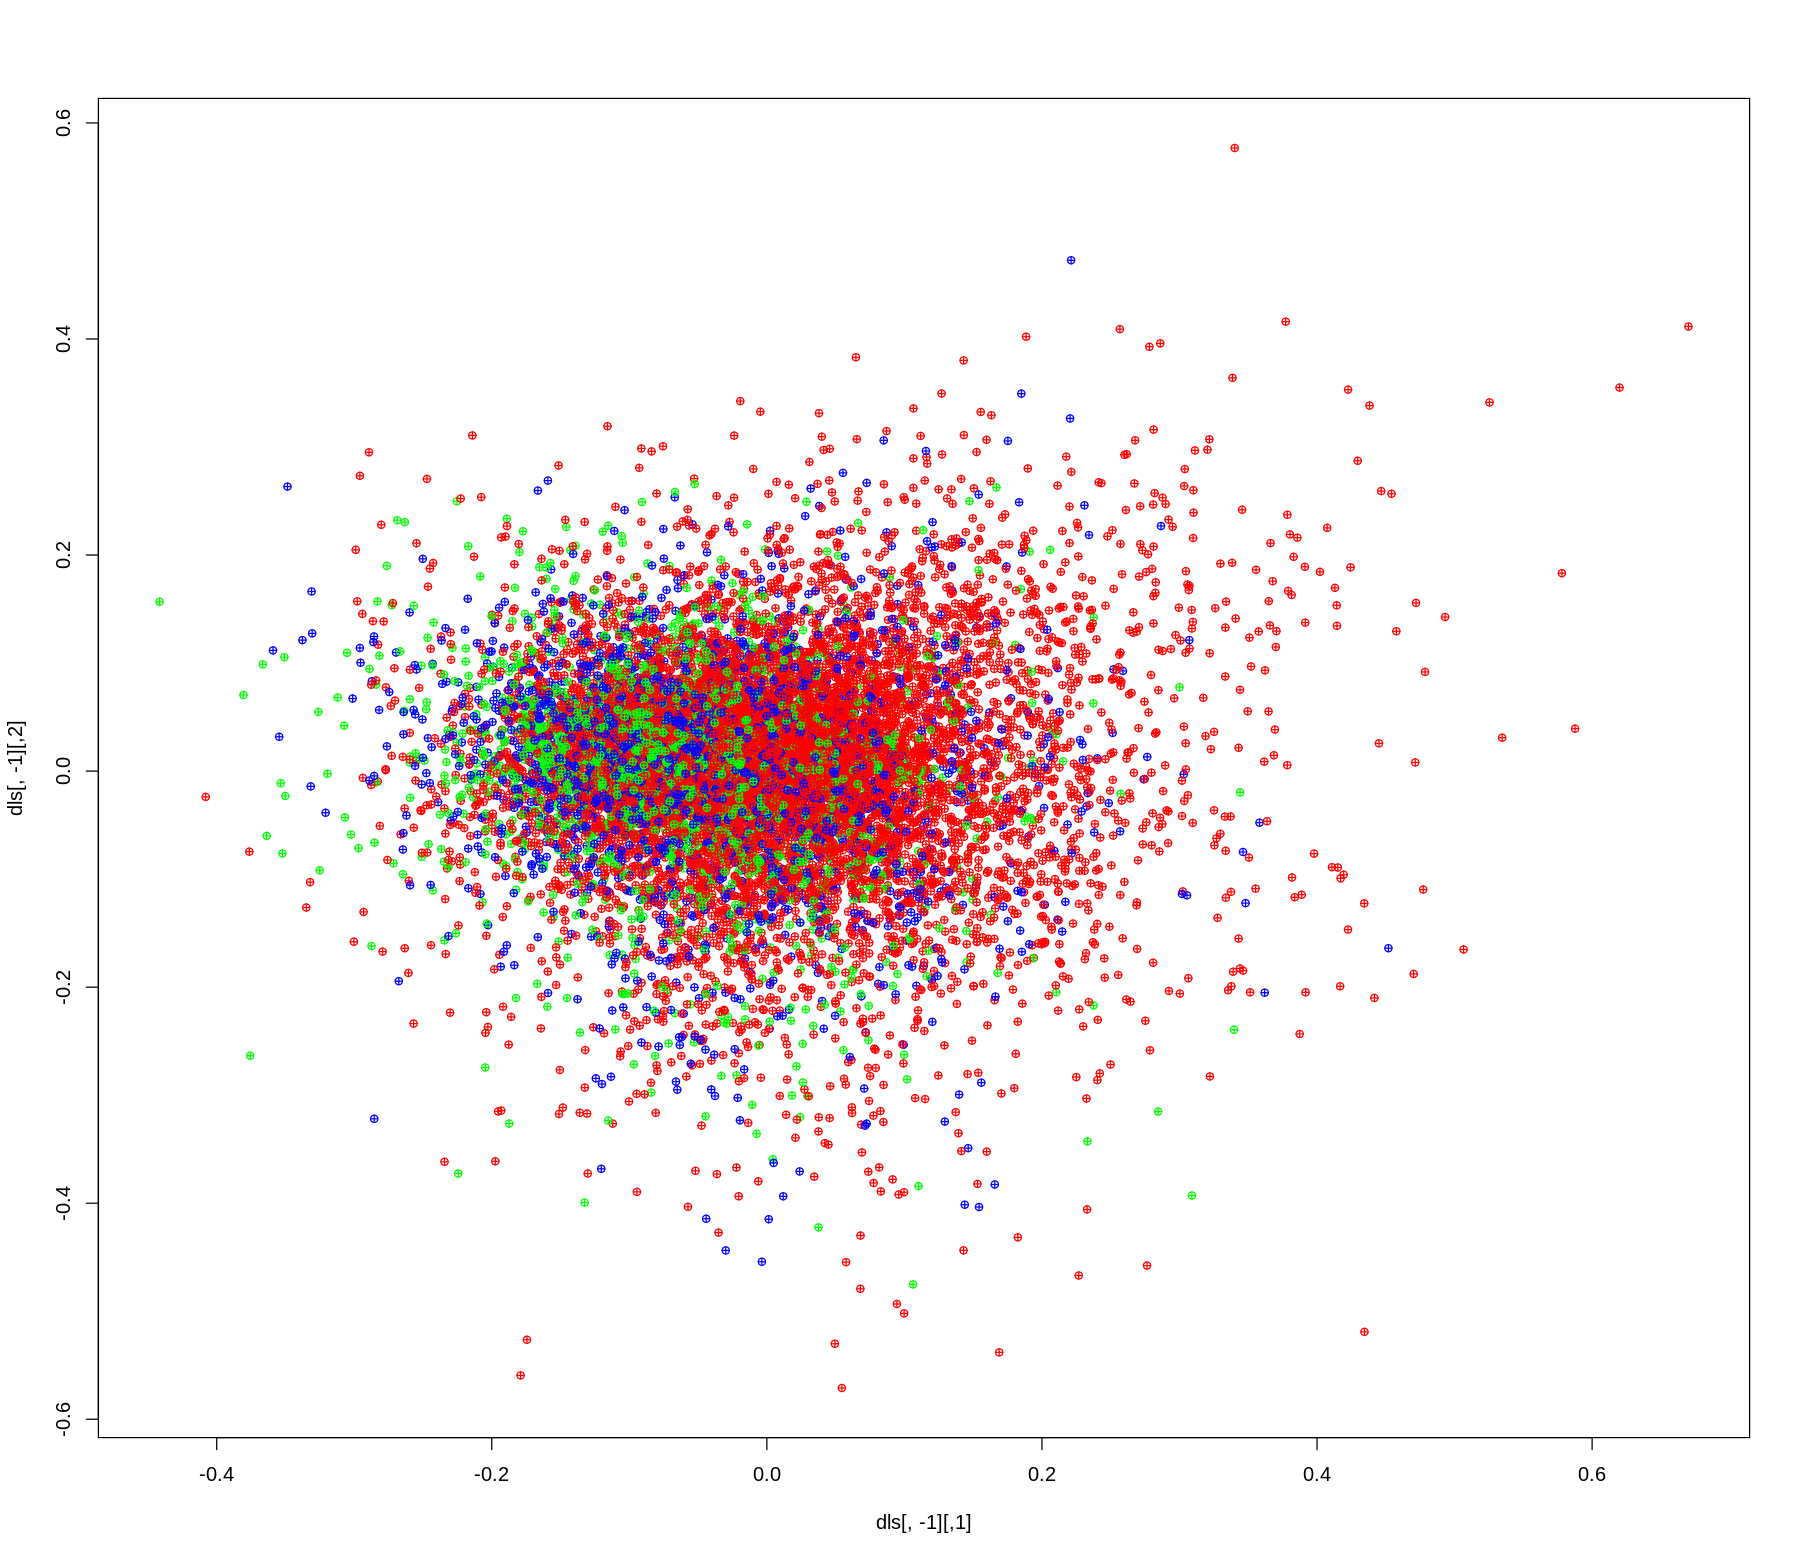

In [33]:
#png("test.png", width     = 2.25, height    = 2.25, units     = "in", res       = 300,pointsize = 1)
options(repr.plot.width=15, repr.plot.height=13)
plot( dls[,-1], pch=10, cex=0.8, col=ratingcols)

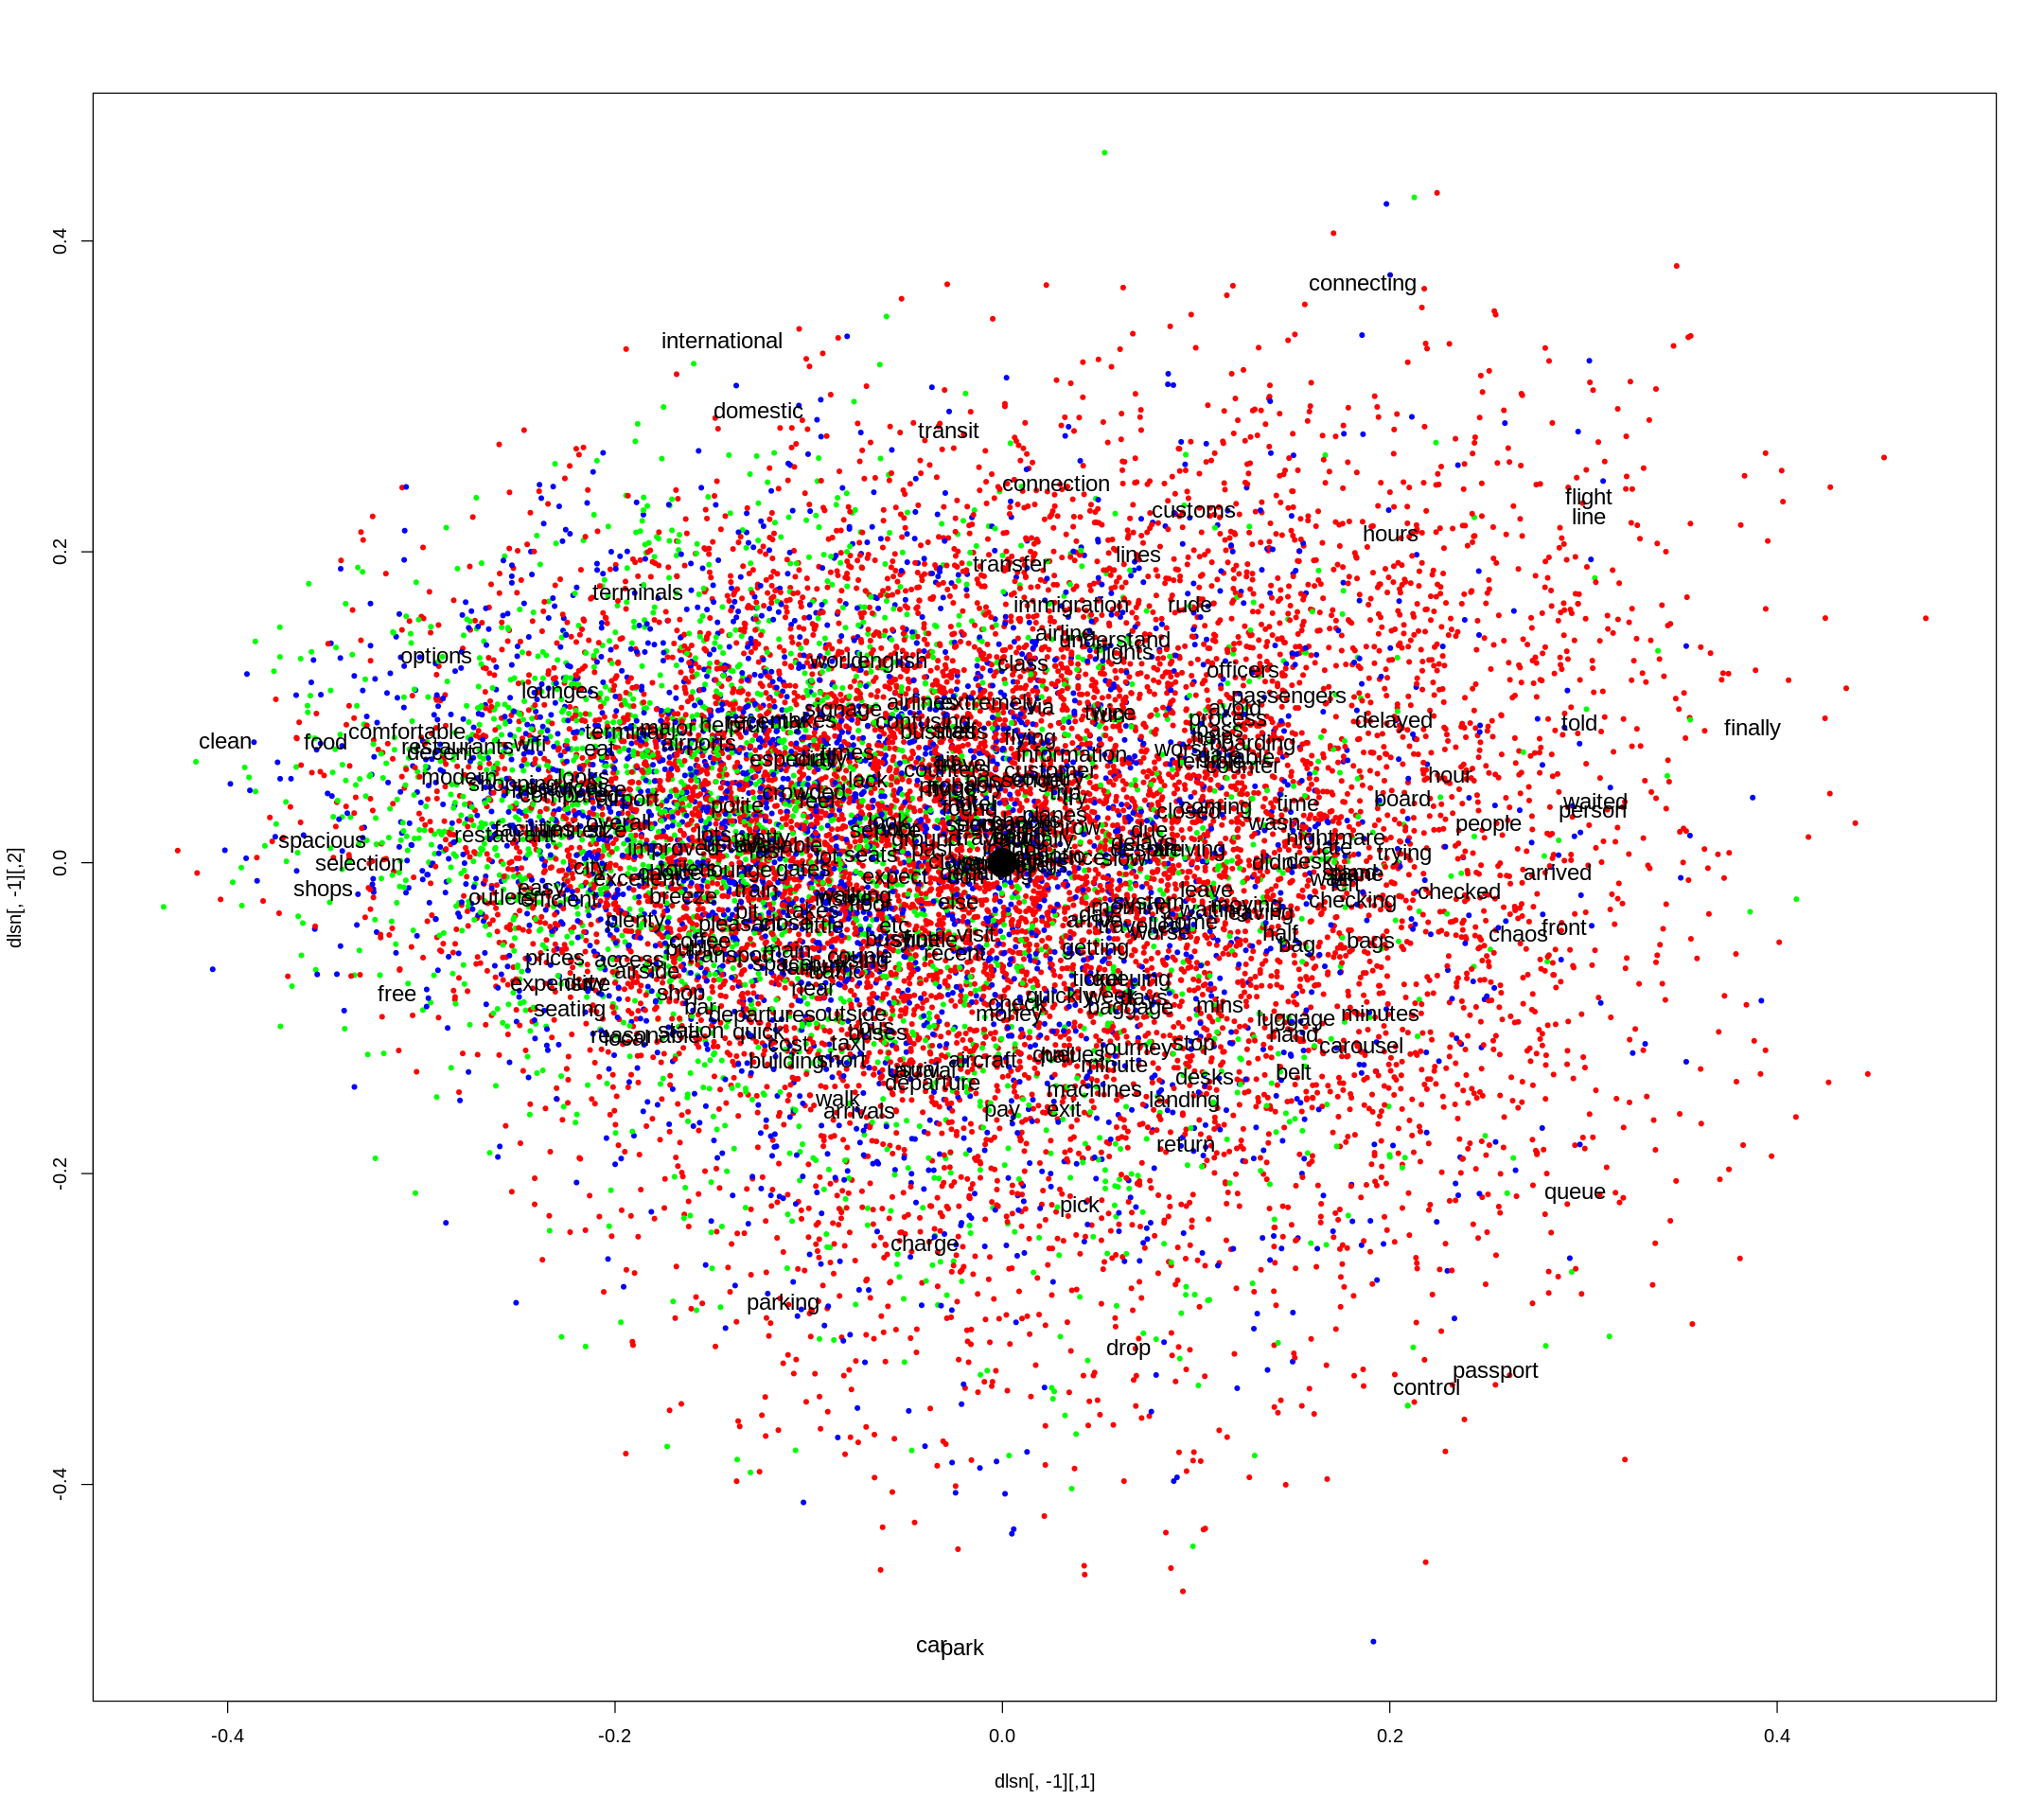

In [34]:
#dev.off()
# definition and application of the function for the normalization of terms and docs vectors 
# in fact the vectors tls and dls are not normal because achieved by the product with sk (eigenvalues matrix) 
normrows <- function(x) x / apply(x,1,norm,"2")
tlsn <- normrows(tls)
dlsn <- normrows(dls)



# new graph with normalized vectors of terms and docs
options(repr.plot.width=18, repr.plot.height=16)
plot( dlsn[,-1], pch=20, cex=0.8, col=ratingcols )
text( tlsn[,-1], labels=words, cex=1.2)
points( 0, 0, pch=20, cex=5 )

In [35]:
# the term excellent (hard to see in the png) appears in the LSA space near the center of an area with unusual concentration of good reviews 
# therefore let's verify objectively if exits a lexical correlation between the term polite and  
# the good reviews in the original space tdm, i.e. not-lsa. In this 
# case we consider only the docs containing the term line.
# To perform this analysis we use the chisquare test 
excellent.vs.good <- table( tdm["excellent",]>0, ratings_norm=="Good")
dimnames(excellent.vs.good) <- list(excellent = c("No", "Yes"), good = c("No", "Yes"))
chisqtest = chisq.test( excellent.vs.good, correct=FALSE ) 


chisqtest


	Pearson's Chi-squared test

data:  excellent.vs.good
X-squared = 279.84, df = 1, p-value < 2.2e-16


In the results of our test we see that the word excellent seems to appear in twice as many good reviews as expected

In [36]:
# expected values and observed values from the chisquare test 
chisqtest$expected
chisqtest$observed # 2493 good revies

good
excellent No         Yes      
      No  10727.8546 2366.1454
      Yes   575.1454  126.8546

         good
excellent    No   Yes
      No  10894  2200
      Yes   409   293

In [37]:
# let's find the semantically closest term to passengers in the LSA space
assoc = associate(tls[,2:3], "excellent", threshold=0.8)
assoc
# from the result it emerges that the shops line is the semantically closest to 
# excellent
# it should be noted however, that gates and lounge are also very close and have a higher norm
# so we will select lounge as it has the highest norm

shops       gates      lounge      choice       water        easy 
  0.9999993   0.9999983   0.9999292   0.9998326   0.9997928   0.9996739 
    toilets     outlets        city   efficient   selection      breeze 
  0.9994919   0.9994814   0.9993749   0.9988476   0.9985842   0.9971446 
      train    spacious       claim         lot    improved        fast 
  0.9969298   0.9959599   0.9950223   0.9949675   0.9947036   0.9932237 
 restaurant       seats     usually      expect  facilities      plenty 
  0.9924156   0.9918147   0.9912466   0.9909650   0.9899120   0.9895534 
    limited   available        size      pretty        lots         bit 
  0.9890309   0.9880650   0.9878328   0.9856807   0.9846250   0.9845048 
    overall        free      prices      inside     walking    pleasant 
  0.9831447   0.9779953   0.9779806   0.9773089   0.9744639   0.9716015 
   compared    friendly    shopping       clean       takes      modern 
  0.9715177   0.9706401   0.9698295   0.9697912   0.9697120   0.9694582 
    airport      coffee        past      access    services        food 
  0.9674321   0.9674202   0.9661973   0.9647965   0.9644375   0.9631741 
  expensive       close        nice      public      decent        duty 
  0.9612135   0.9610655   0.9610165   0.9589395   0.9572629   0.9562267 
      looks      polite     airside restaurants       floor comfortable 
  0.9544121   0.9527507   0.9524303   0.9517117   0.9513429   0.9487629 
    seating        wifi   transport      little         don         eat 
  0.9390749   0.9371557   0.9371323   0.9364641   0.9302401   0.9243598 
    service      ground        poor        main        shop        feel 
  0.9236364   0.9234408   0.9194802   0.9153779   0.9136024   0.8998730 
   terminal     crowded       local        look     options         bar 
  0.8952166   0.8913856   0.8905153   0.8896080   0.8885282   0.8862264 
      space  reasonable    security     lounges    airports       major 
  0.8858307   0.8825290   0.8779375   0.8778247   0.8758007   0.8719383 
     fairly     station         etc         buy  especially     helpful 
  0.8601527   0.8588993   0.8406965   0.8346452   0.8207177   0.8193561 
 departures     traffic      couple        near 
  0.8131891   0.8106613   0.8010585   0.8006258

In [38]:
tls_term_norms[,116]["shops"]
tls_term_norms[,116]["gates"]
tls_term_norms[,116]["lounge"]
tls_term_norms[,116]["choice"]

shops 
5.876962

gates 
7.067859

lounge 
7.133579

choice 
2.946938

In [39]:
# let's verify if also the couple "excellent lounge" is objectively correlated to good reviews 
# in the original space tdm, namely if there is lexical correlation as in the previous case.
excellentlounge.vs.good <- table( tdm["excellent",]>0 & tdm["lounge",]>0, ratings_norm=="Good" )
dimnames(excellentlounge.vs.good) <- list(excellent_lounge = c("No", "Yes"), good = c("No", "Yes"))
chisqtest = chisq.test(excellentlounge.vs.good, correct=FALSE )
# the correlation is less strong for this query here, but it still exists
chisqtest


	Pearson's Chi-squared test

data:  excellentlounge.vs.good
X-squared = 20.943, df = 1, p-value = 4.732e-06


In [40]:
# let's repeat the analysis in the LSA space, to evaluate if there exists SEMANTIC correlation  
#  between the couple of terms "excellent shops" and the good reviews.
# In this case the considered docs could also not contain the two terms, but they may contain 
# semantically correlated terms to them.
# To peform this analysis let's transform the query "excellent lounge" in a doc and do the fold_in in the 
# LSA spaces
elq <- "excellent lounge"
elv <- query( elq, words )
elle <- lw_logtf(elv) * ( 1-entropy(tdm) )
ells <- t(elle) %*% lsar$tk
ells

[,1]       [,2]        [,3]         [,4]       [,5]      
EXCELLENT LOUNGE -0.0226721 -0.02948241 -0.001615558 0.02185336 0.01239718
                 [,6]         [,7]        [,8]       [,9]         [,10]     
EXCELLENT LOUNGE -0.007774385 -0.03358215 0.01258548 -0.003715338 0.06789513
                 [,11] [,12]       [,13]      [,14]        [,15]        
EXCELLENT LOUNGE ⋯     -0.03170445 0.01822497 -0.009381396 -0.0003318368
                 [,16]      [,17]      [,18]       [,19]       [,20]      
EXCELLENT LOUNGE 0.02244141 0.00341556 -0.04667883 0.001950156 -0.01762702
                 [,21]      
EXCELLENT LOUNGE -0.01371125

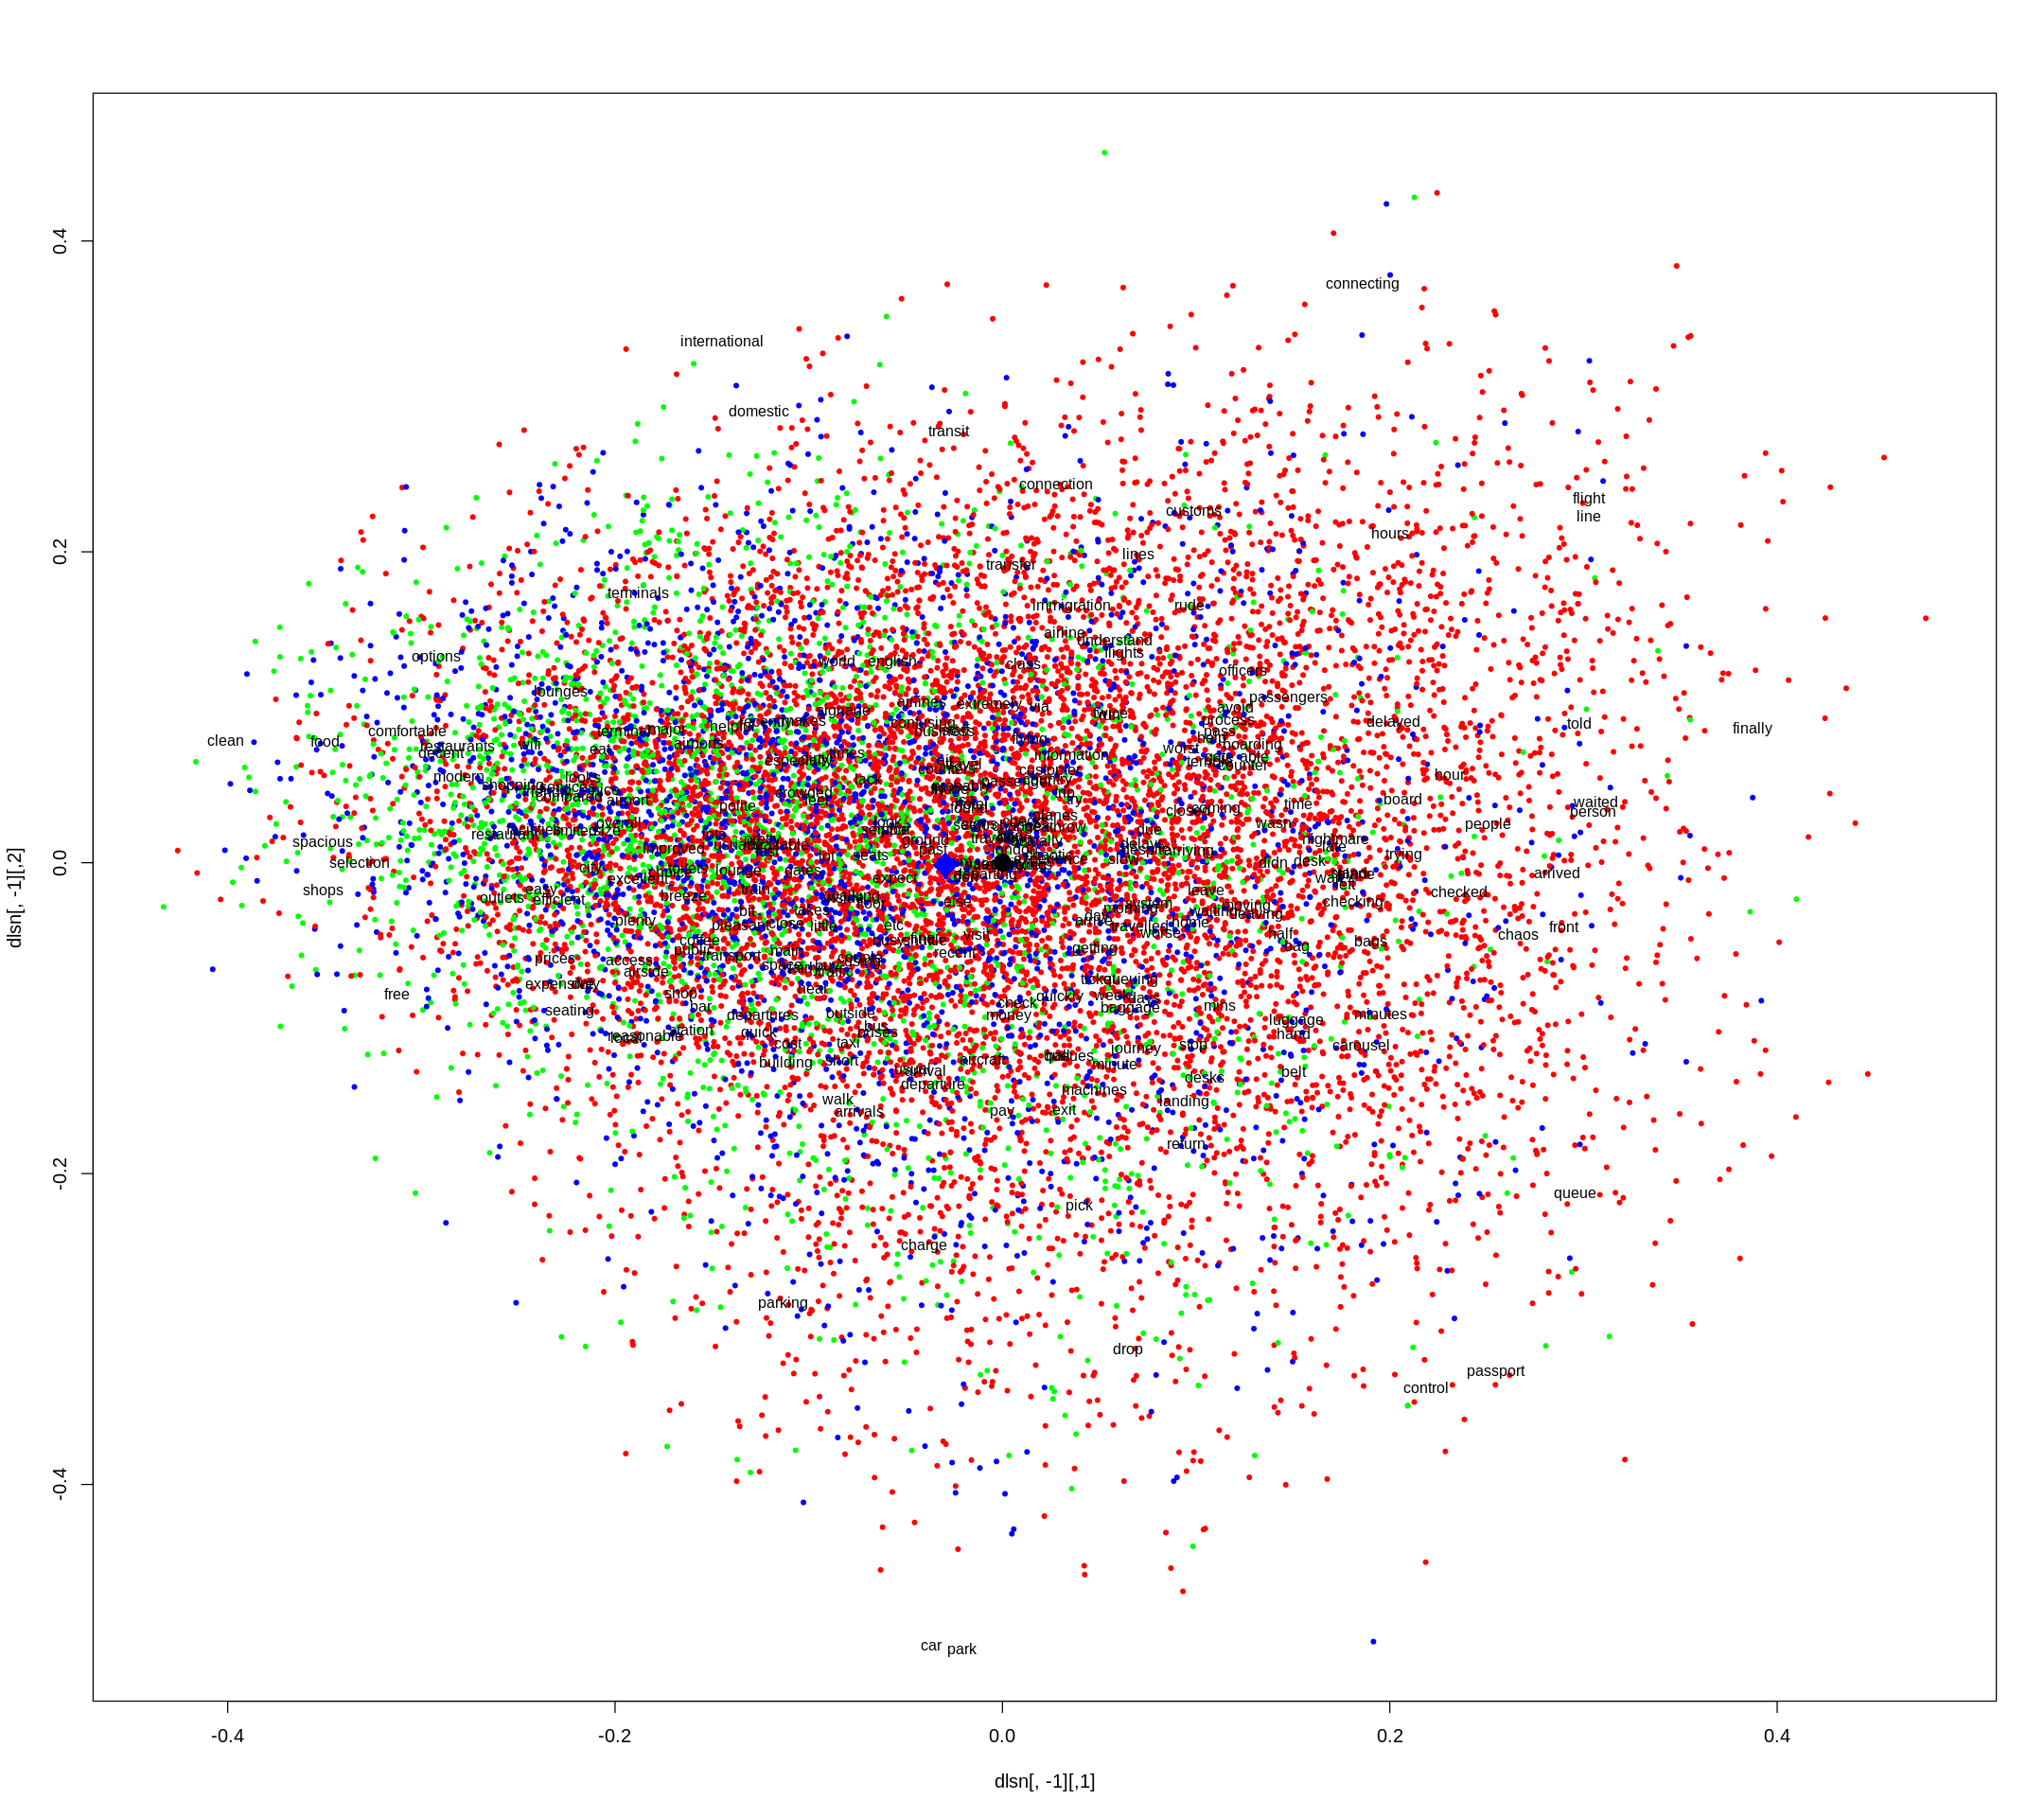

In [41]:
# graph of the terms and docs in the LSA space using the dimensions 2 and 3
plot( dlsn[,-1], pch=20, cex=0.8, col=ratingcols )
text( tlsn[,-1], labels=words, cex=0.8 )
points( 0, 0, pch=20, cex=3 )  # display the origin 0,0 of the graph 
fwlsn <- normrows( ells ) # vector query normalization 
points(ells[2],ells[3],cex=3,pch=18,col="blue") # display of the query in the graph 

We see that the query is still pretty close to the center, however it is moving in the correct direction (the direction with the unusual concentration of good reviews)

In [42]:
# function takes vector Q and calculates its cosine similarities with matrix X
cosines <- function(X, Q) apply( X, 1, cosine, as.vector(Q) )
# function takes the indexes (positions) of the highest N values in X
top <- function(X, N) order( X, decreasing=TRUE )[1:N]


In [43]:
# indexes of the 10 documents that have the semantically highest similarity to the query "excellent lounge"
# considering only the second and third dimensions.
top( cosines( dls[,2:3], ells[2:3] ), 10 )
# Show the 10 reviews with the highest similarities
contents[top(cosines(dls[,2:3], ells[2:3]), 10)]


[1]  4932  8590  6462 12682  2196  9523 10354 13091  1425  1394

[1] "GRX is a small regional airport. Boarding and disembarking aircraft is usually very quick due to the limited aircraft movements. Passenger facilities are limited waiting areas are small no lounges minimal eating outlets and taxi's are hard to come by (which is surprising for an airport). However some of the nicest security screening staff that I have ever come across always smiling and patient with passengers (UK and US staff can really learn something here!)."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
 [2] "Typical Charter Airport at its soul but you know what it has got better over the years. Big Check in Halls can cope with mountainous amounts of passengers. Security is good and fast and the airside is ok. Nothing special but adequate. Arriving can be a bit tiresome but again as with all charter airports baggage handling can be slow but have never had major issues. The one they could really do is join up the thinking here. The south coast of Spain is now a massive long city and there is a train running along it. They need to connect the whole thing together for the locals if not for the tourists."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [3] "Kuala Lumpur low cost terminal is an abomination one may travel on a low cost airline but to be herded into a nothing more than a warehouse is appalling. There is no train connection between the main terminals and the low cost one one has to travel there by very uncomfortable buses from KL Sentral because the option of the airport-city rail link does not have an extension from the main terminal. The Gates are no more than doors that open on to the tarmac from which one is expected to walk to the aircraft. The monitors at the so-called gates are set too low to be seen when sitting down and should be placed a lot higher preferably above the doors where they will be visible to all. There are sufficient eateries and basic duty free shops. The immigration control is on the ground level after which one has to climb to the first floor and then back to the ground floor for departures. Why not just have a one level walkway between immigration and the departures lounge? Seating is insufficient leading to people queuing for long periods or left to mill around. This low cost terminal is not fit for a large international airport and puts KLIA to shame."
 [4] "I was recently in Taipei for two layovers one for an entire day so i got to know it pretty well. My initial thoughts about the old Terminal 1 was that it was old cold and smelt quite odd but after a while you get past that and it is a nice change from more busy airports where there are constantly announcements crowds and salespeople. Terminal Two which is much newer strikes a good balance and I found it really warm comfy and well signed. The service I found in Taipei was great and no one hesitat

It seems we lose some information, let's find the ideal number of latent dimensions to use

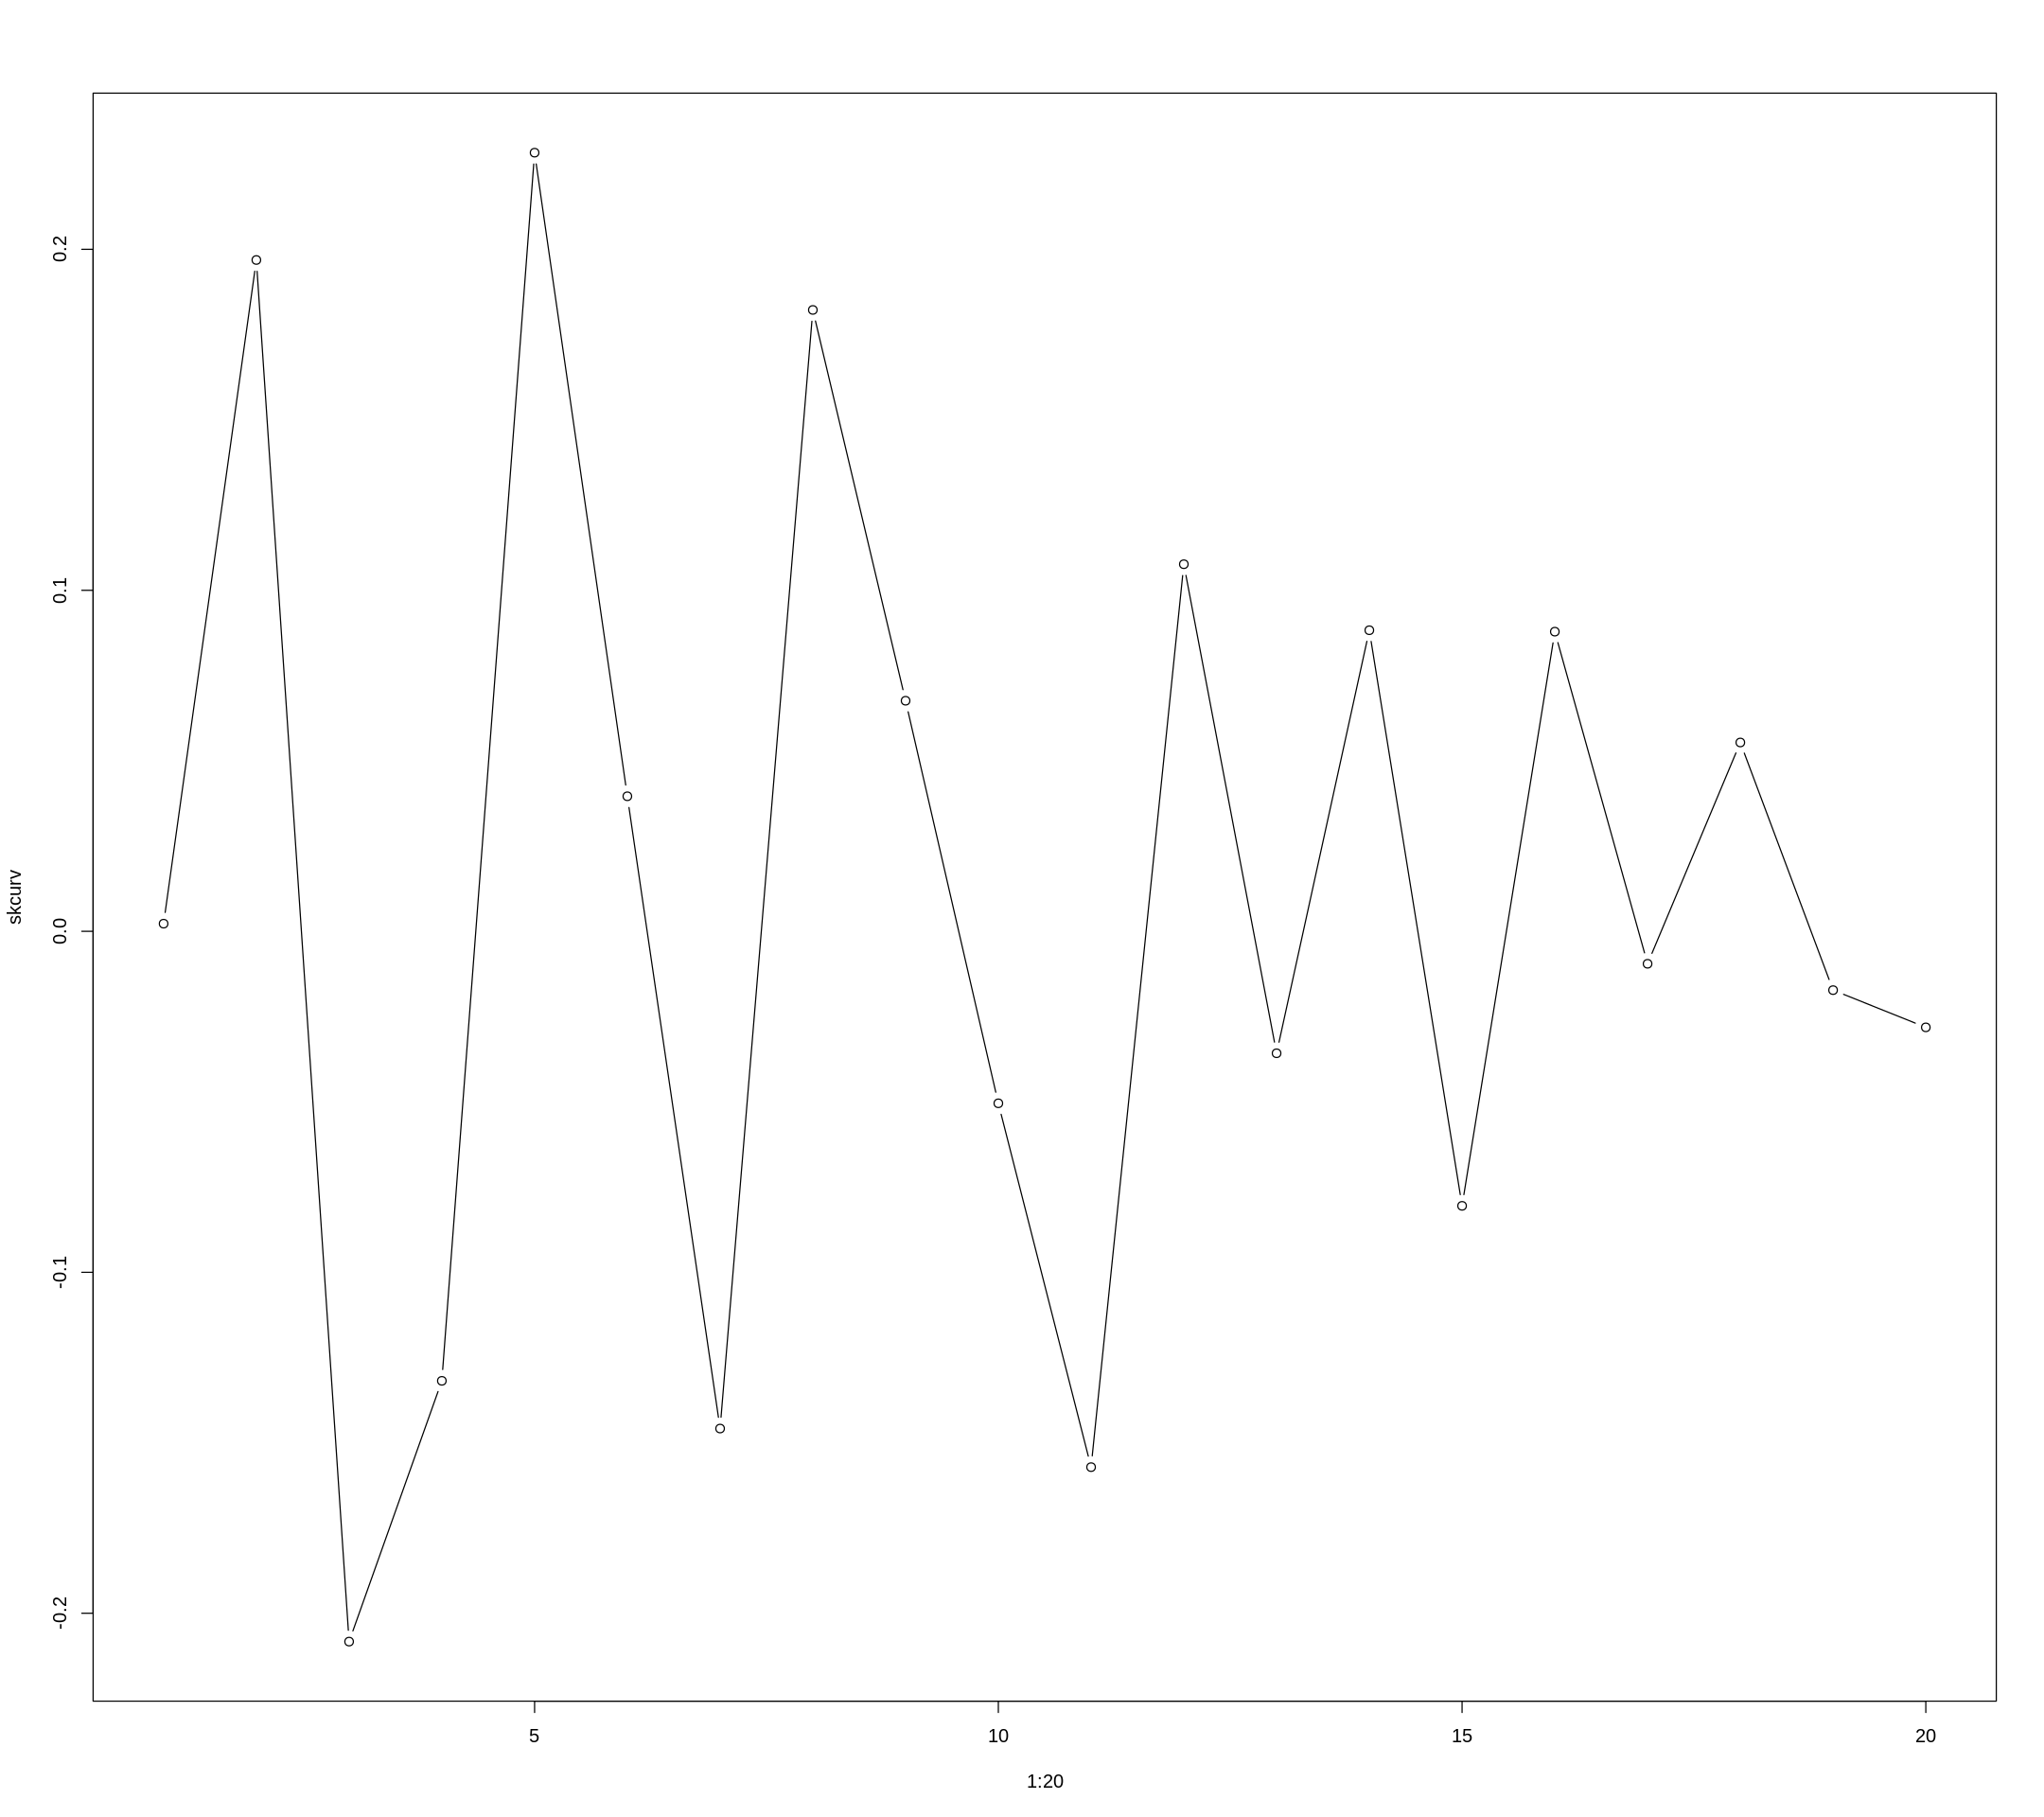

In [44]:
# we select an LSA space with the most dimensions, and therefore the lowest loss of information
# To do this, we identify a knee point in the eigenvalues and use that many dimensions
fordiff <- function(x) x[2:length(x)] - x[1:(length(x)-1)]
skd <- fordiff(lsar$sk)
skdd <- fordiff(skd)
skcurv <- skdd[1:20] / (1+(skd[1:20])^2)^1.5
plot( 1:20, skcurv, type="b" )


In [45]:
# the first local minimum is at 3,so we also use the first three dimensions.
# and we extract the 10 documents that are most similar to our query in the space

contents[top(cosines(dls[,1:3], ells[1:3]), 10)]

[1] "Modern facilities that do not always work. Staff were unfriendly. Proof that a \"new\" building does not guarantee a good airport. On top the generous layout of the airport is clogged with medium range shops and outlets. Sad."                                                                                                                                                                                                                                         
 [2] "Airports do not come much smaller than this - easy to use both inbound and outbound. Currently undergoing some expansion work but there were no difficulties because of that. Airside there are refreshments a bookshop tourist junk and internet. Landside not a lot."                                                                                                                                                                                                    
 [3] "Manchester-Copenhagen return. Kastrup is an impressive airport clean modern easy to navigate and staffed by polite and informative staff. Expensive shops however this is to be expected at a Scandinavian airport quality is decent though."                                                                                                                                                                                                                              
 [4] "Check in and security very fast and efficient but then you hit the overpriced shops and the limited and expensive catering options. They should let the cafe outside arrivals take over a spot inside they offer decent food at good prices. The place is clean the staff are pleasant and helpful but it doesn't make up for the over priced shops and the limited choice of food."                                                                                       
 [5] "Excellent airport especially the new terminal 2. It was just built so is modern clean spacious and simple to use. Lots of shops and duty free nice places to eat and sit down. Terminal 1 is also great with many options for food and shopping although it's an older building - always clean and organized. The airport as a whole is excellent well located with plenty of parking spaces and bus routes and soon the new rail system will make everything even easier."
 [6] "Auckland airport is very easy with plenty of shops and catering outlets. Checkin staff pleasant and informative."                                                                                                                                                                                                                                                                                                                                                          
 [7] "Well planned easy to navigate clean efficient very fast security/passport controls (perhaps the fastest that I have ever seen) excellent transport connections and a pleasant atmosphere. Simply a great airport and surely one of the best I have used. Not as amazing and glamorous as Changi but certainly deserves a place in global top-10."                                                                                                                          
 [8] "Had a great experience in Vienna Airport. Very clean and convenient with plenty of transport to go to the city. Great duty-free shops and plenty of eateries. One of the best airports I have ever visited!"                                                                                                                                                                                                                                                               
 [9] "Free food and snacks provided. Great wifi. Nice comfortable chairs like a business lounge. I was able to walk to my accommodation which I've never done before! Very easy access to Toronto with a short free ferry ride and then streetcar available on Bathurst St. Very 

In [98]:
#To determine if there exists a correlation between excellent lounge and good reviews
# based on a scientific model, we will s test with an
# R-precision of 2493. This allows a theoretical model to retrieve all good reviews
# using our query.

table( ratings_norm )
table( ratings_norm[ top( cosines( dls[,1:3], ells[1:3] ), 2493 ) ] ) # 2493 good reviews out of 13796 (18% of 13796)
elq.vs.good <- table(1:nrow(dls) %in% top(cosines(dls[,1:3], ells[1:3]), 2493), ratings_norm=="Good" )
dimnames(elq.vs.good) <- list(excellent_lounge = c("No", "Yes"), good = c("No", "Yes"))
elq.vs.good

#we would expect our model to find around 450 (18% of 2493) reviews if it was purely random, however
# it finds a lot more, almost twice as much


ratings_norm
Average    Good    Poor 
   2728    2493    8575 


Average    Good    Poor 
    615     792    1086 

                good
excellent_lounge   No  Yes
             No  9602 1701
             Yes 1701  792

In [50]:
# we verify this with a chi-square test
chisq.test( elq.vs.good, correct=FALSE )




	Pearson's Chi-squared test

data:  elq.vs.good
X-squared = 385.67, df = 1, p-value < 2.2e-16


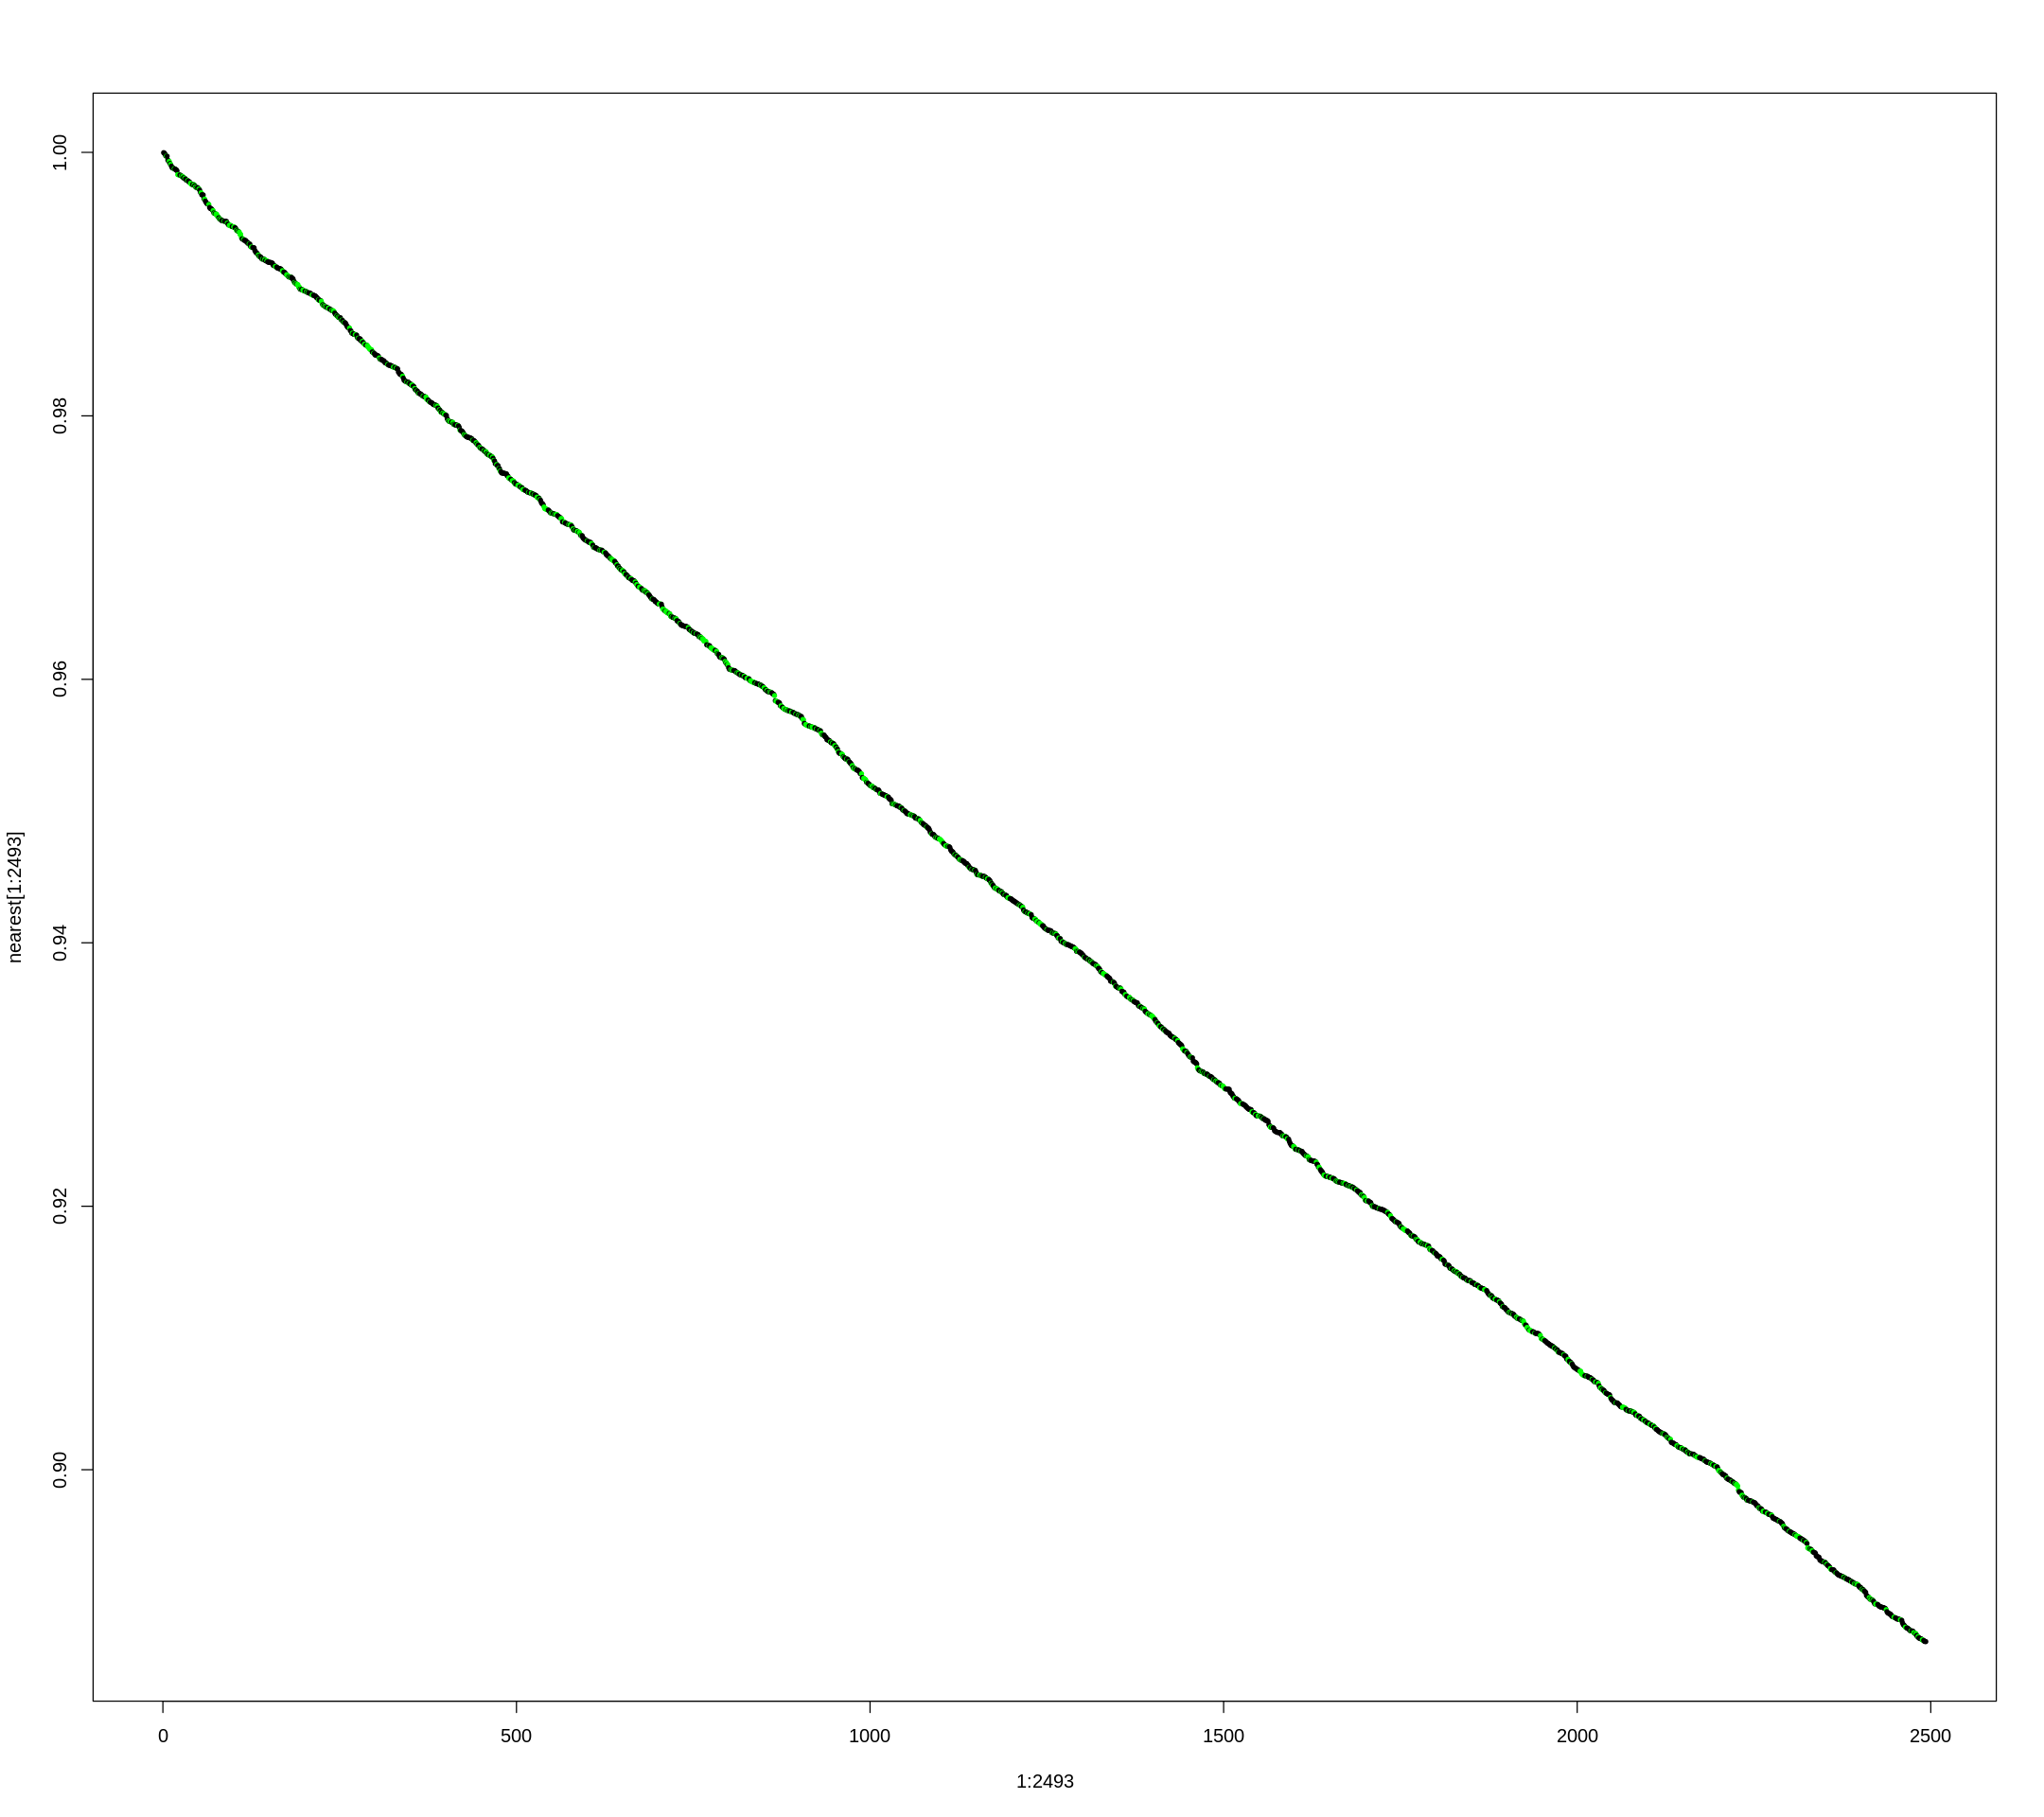

In [52]:

#to find out if our semantic correlation makes sense we will plot documents.
# it can be seen that results of our query show up more in the upper part
# of the graph (look at the values of the correlations, all above 0.9)
# we therefore conclude that there indeed is a semantic correlation
nearest <- sort( cosines( dls[,1:3], ells[1:3] ), decreasing=T )

ratingcols2 <- rep( "black", 13796 ) # crea lista con 3229 volte la parola black
ratingcols2[ ratings_norm == "Good" ] <- "green" # pone a red i rapporti destroyed

plot( 1:2493, nearest[1:2493], pch=20, cex=0.7, col=ratingcols2[strtoi(names(nearest))] )



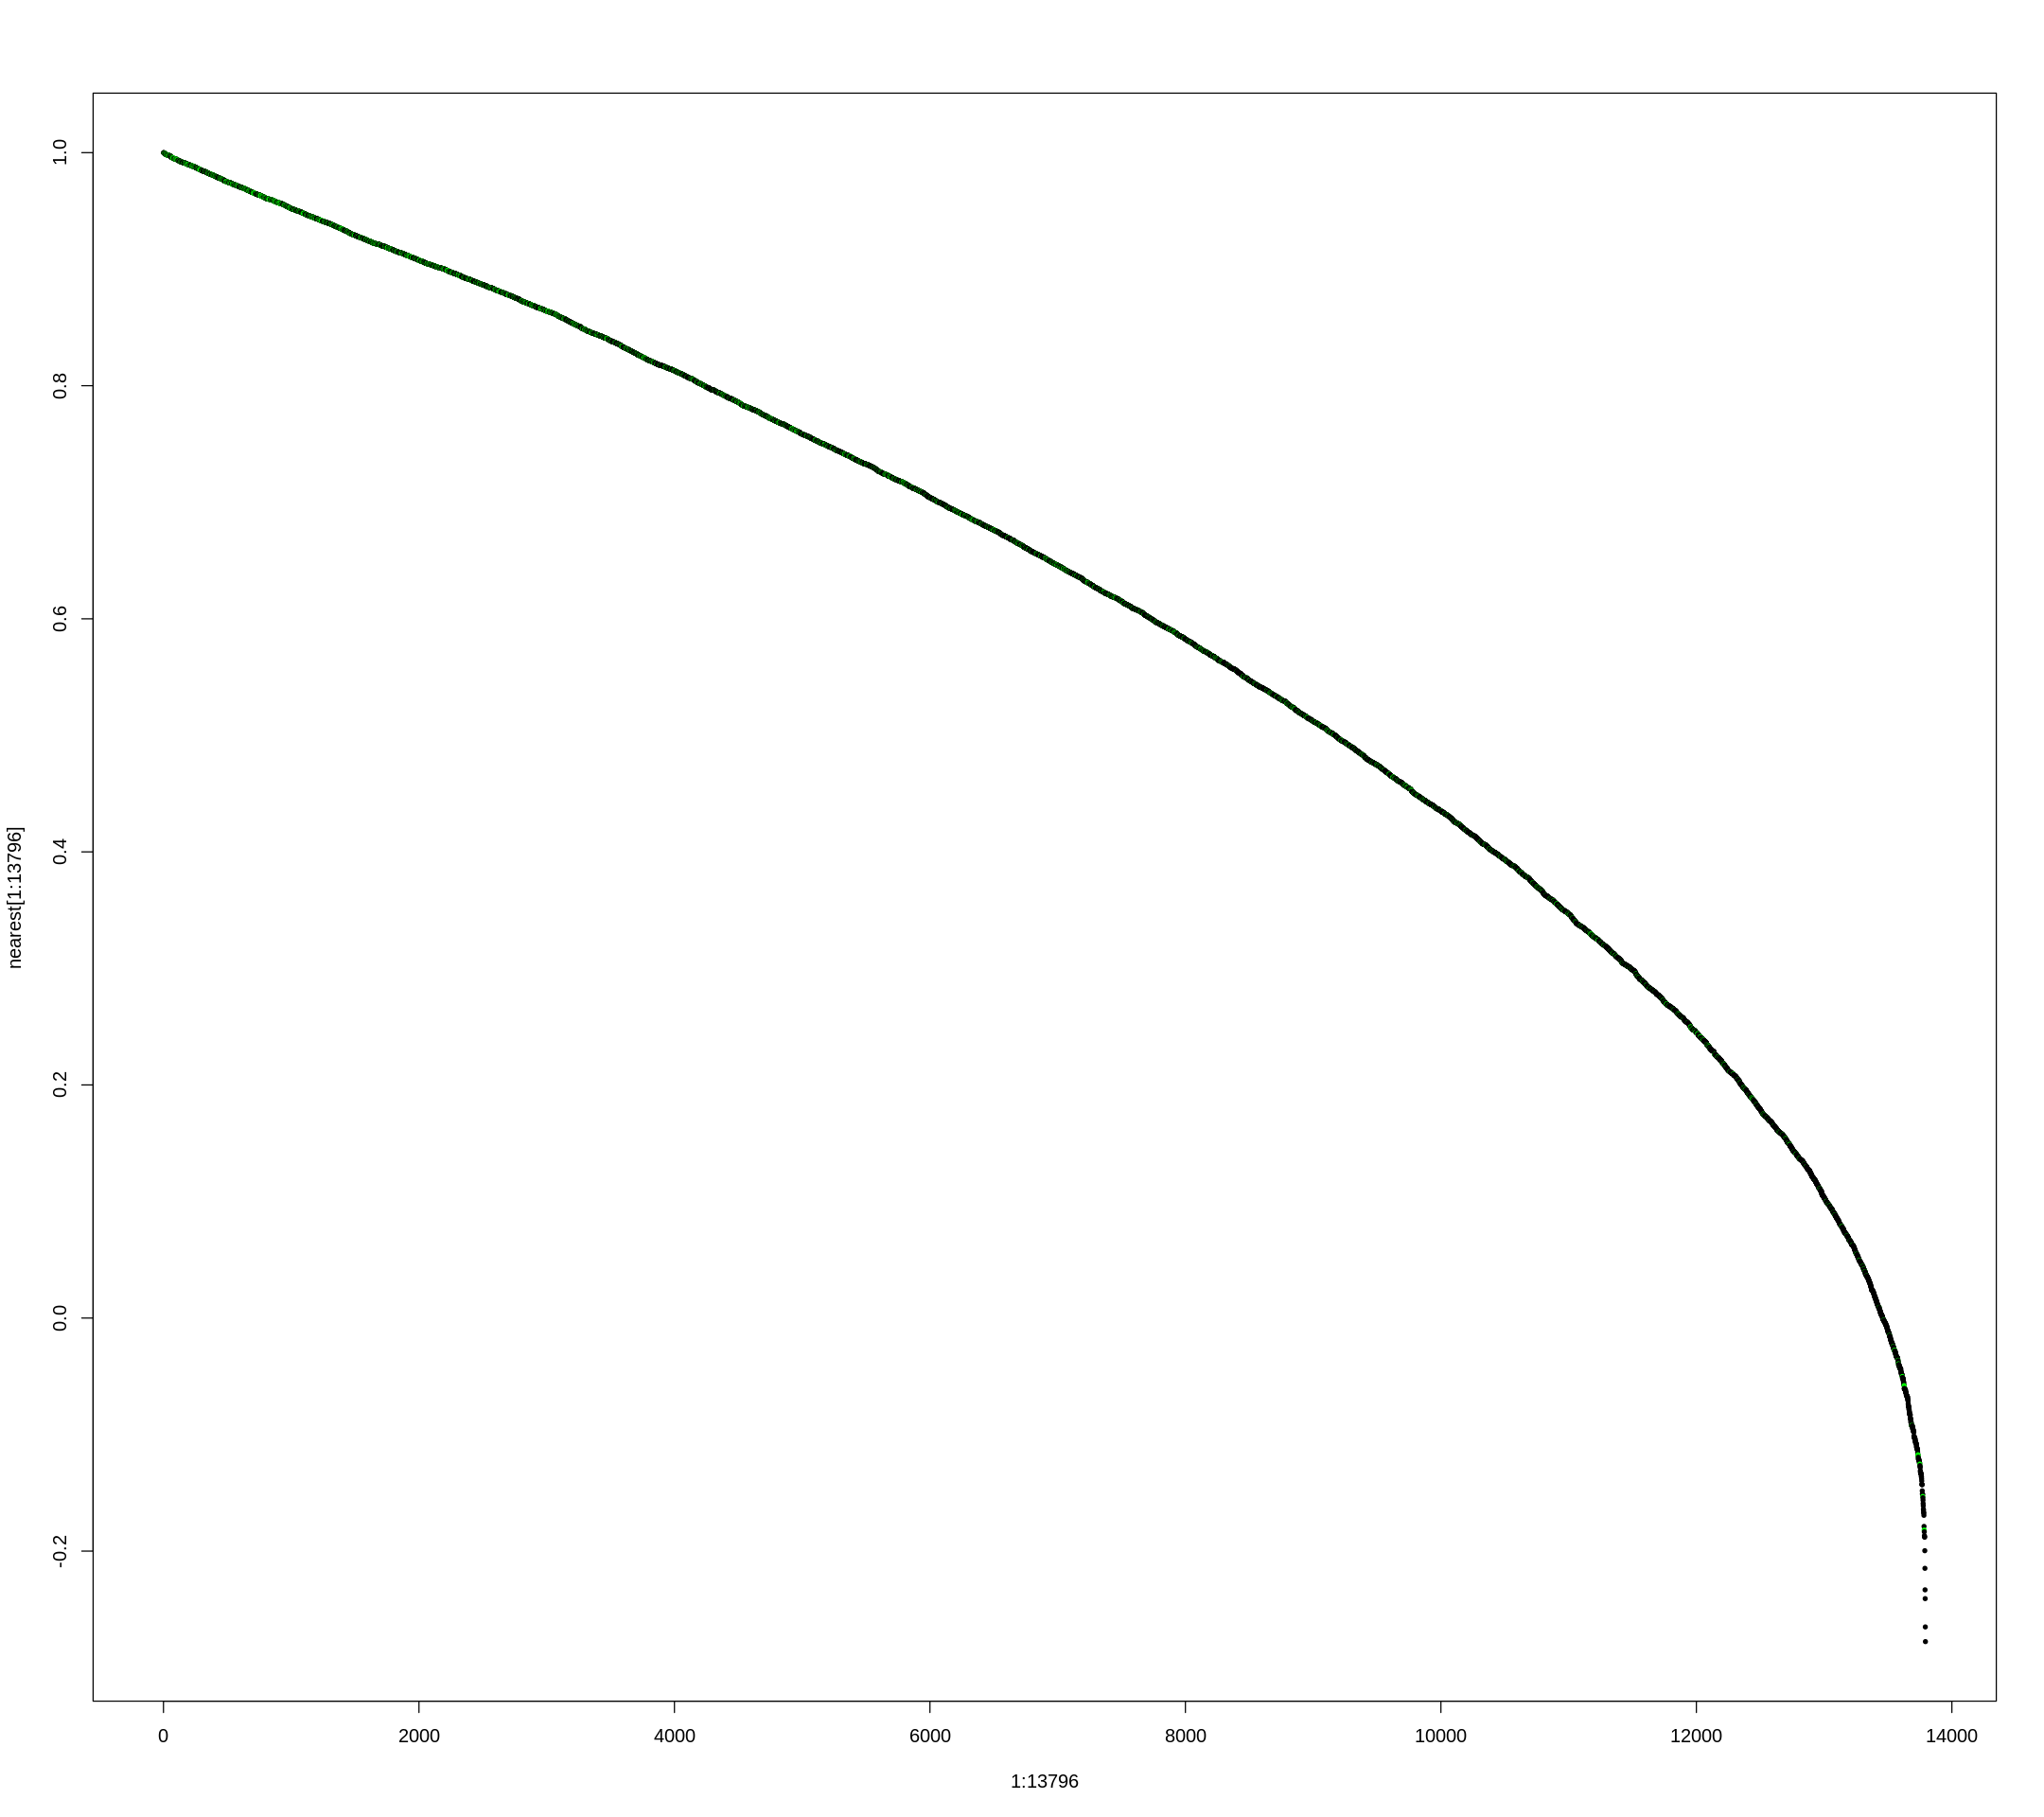

In [53]:
#to drive the previous point home, here is the closest documents if we plot them all

plot( 1:13796, nearest[1:13796], pch=20, cex=0.7, col=ratingcols2[strtoi(names(nearest))] )

In [55]:



#now let us expand our query. We do this by finding terms with a high cosine similarity, above a certain thershold
# and then picking the term with the highest norm
tksrs <- lsar$tk %*% diag( sqrt( lsar$sk ) )
esgksrs <- ells %*% diag( lsar$sk^-0.5 )

sort( cosines( tksrs[,1:3], esgksrs[1:3] ) ) 
# purely based on cosines we also get correlations in negative quadrants, these are 
# of course not usefull


told       finally        waited          line        person 
 -0.537059603  -0.493768949  -0.455083590  -0.407124459  -0.388466522 
        front         chaos       checked       delayed       arrived 
 -0.379014067  -0.315960549  -0.303845662  -0.290324727  -0.281131515 
        queue         board          hour    connecting           bag 
 -0.275815909  -0.254022828  -0.247084294  -0.236760779  -0.236596740 
       people        trying          bags         hours          left 
 -0.219433925  -0.212004680  -0.201499646  -0.199092101  -0.192410569 
       flight          desk          didn         plane      carousel 
 -0.187841034  -0.186857002  -0.181329867  -0.180255665  -0.173884119 
         late      passport      checking      officers         stand 
 -0.173051893  -0.166145206  -0.159130290  -0.154305613  -0.131320562 
      control          belt          half       counter       process 
 -0.126599583  -0.126354179  -0.121926249  -0.117666036  -0.100346643 
         hand          wait          help          mins     nightmare 
 -0.096875601  -0.089500805  -0.083127878  -0.082870460  -0.073583952 
      leaving          rude       minutes         avoid          wasn 
 -0.071600391  -0.069035055  -0.057145399  -0.055014027  -0.045970665 
         pass       luggage    passengers      boarding         worst 
 -0.036233639  -0.034325440  -0.015455552  -0.007443611  -0.006076282 
      customs      terrible         desks        coming          able 
 -0.003015263   0.016826565   0.025724309   0.033056333   0.034805583 
        lines        moving        system         leave       waiting 
  0.038503248   0.043724384   0.060247036   0.067417049   0.073246191 
     arriving        return    connection          gate        closed 
  0.074325606   0.089747934   0.091228679   0.091476457   0.095021920 
         drop           due          time          home         worse 
  0.097467459   0.101238039   0.105562398   0.109620363   0.128794008 
      queuing        delays       landing          stop        ticket 
  0.131597485   0.133824077   0.135893821   0.139414044   0.148396135 
         slow    understand       morning       journey     travelled 
  0.149918454   0.151879897   0.153619195   0.171313529   0.171492085 
         pick       despite        minute       flights          park 
  0.185114543   0.195357472   0.196835370   0.200238554   0.203385252 
         days      transfer   information           run       airline 
  0.209037923   0.210312605   0.211429693   0.214531639   0.215562235 
          day       getting         twice       baggage        arrive 
  0.219946696   0.225272829   0.231664084   0.234708904   0.239655310 
      transit         class      customer      heathrow           car 
  0.243164829   0.246880844   0.248599588   0.249855295   0.250338829 
     machines          week          trip   immigration       country 
  0.250358531   0.254889840   0.266200042   0.268620266   0.269629205 
         exit           try          hall           via        queues 
  0.275539635   0.279350804   0.279665729   0.286044198   0.303077292 
       flying       quickly        planes       chaotic    experience 
  0.312609184   0.315126454   0.327612038   0.345247968   0.353944890 
          pay        checks      actually     passenger     extremely 
  0.354612939   0.359787273   0.365334632   0.365486365   0.382553501 
        money        london    travellers        change        charge 
  0.384293503   0.389542238   0.391677235   0.393719582   0.396498500 
         flew       looking           bad         check      aircraft 
  0.400505607   0.400682928   0.408348592   0.416198942   0.417004671 
   travelling      security         staff     departing      domestic 
  0.427441129   0.433185171   0.461082980   0.464541727   0.471454139 
       travel         visit         signs      probably          seen 
  0.473273599   0.475980560   0.476297029   0.478499718   0.478529683 
          sit international      

In [56]:

# we want to select terms with a high norm, so we find the norms of all terms in the
#latent space, and use our cosines to find the highest norms of closely related terms
tnorms4 <- apply( tls[,1:4], 1, norm, "2" )
tnorms4[cosines(tksrs[,1:3],esgksrs[1:3])>0.95] # we can see that the highest norm that is not yet used is shops


modern restaurant    limited       city       easy      clean    outlets 
  1.980707   1.083950   2.007072   2.657994   2.702140   3.470964   1.368503 
     shops   spacious  selection     prices  excellent 
  3.736459   1.487035   1.297523   2.032887   1.604764

In [57]:
# definition of a function to make a query and roll it into the latent space
makequery <- function(Q, TDM, LSA) {
  V <- query( Q, rownames(TDM) )
  W <- lw_logtf(V) * (1-entropy(TDM))
  LS <- t(W) %*% LSA$tk
  DK <- LS %*% diag(LSA$sk^-1)
  DKSRS <- DK %*% diag(sqrt(LSA$sk))
  list( query=Q, bin=V, v=W, dk=DK, ls=LS, dksrs=DKSRS )
}


In [59]:
elsls <- makequery( "excellent lounge shops", tdm, lsar )
contents[top(cosines(dls[,1:3],elsls$ls[1:3]),10)] # first 10 most recent reports
table( ratings_norm[ top( cosines( dls[,1:3], elsls$ls[1:3]), 2493 ) ] )


#note that we did not find more good reviews using this query, but we moved some average
#ones to the poor category

[1] "This is the best airport I have been in: clean pleasant spacious and has the most to offer. I found service excellent prices reasonable (all different budgets catered for) and enjoyed the free extras like internet or wi-fi access and the cinema. The gardens are also wonderful."                                                                                                                                                                                                      
 [2] "One of my favourite airports. Spacious and efficient. The washrooms are very clean. Areas that need improvement are (1) Duty Free Shopping Variety (2) Acceptance of USD / GBP / AED at the vending machines."                                                                                                                                                                                                                                                                              
 [3] "Excellent. Quiet efficient clean well-equipped. Everything works. Lots of shops etc but not in your face (MAN take note). Non-Schengen side a bit more basic."                                                                                                                                                                                                                                                                                                                              
 [4] "Austin has free internet service Downtown but not at their airport. There is Not a Starbucks but they have a local substitute of a high blend coffee shop. I feel sorry for families traveling because there is not any kind of restaurant food that children will recognize. It would be nice too if there were more electrical outlets for laptops and phone chargers. It is kept very clean and the easy access to rental cars is a very big plus! Amy's Icecream is worth the calories."
 [5] "Much improved environment since my last visit. The re-designed food and beverage outlets after Duty Free make for a pleasing and inviting area. Another noticeable improvement was that the area is being kept much more clean and tidy than in the past. The management still need to improve the public announcement systems which are woefully inadequate particularly the loudspeakers."                                                                                                
 [6] "Beautiful airport building can improve on restaurant options though."                                                                                                                                                                                                                                                                                                                                                                                                                       
 [7] "Well planned easy to navigate clean efficient very fast security/passport controls (perhaps the fastest that I have ever seen) excellent transport connections and a pleasant atmosphere. Simply a great airport and surely one of the best I have used. Not as amazing and glamorous as Changi but certainly deserves a place in global top-10."                                                                                                                                           
 [8] "Nice airy new building spoilt by lack of airside facilities. No airbridge no hot food no water fountain. Free wi-fi though."                                                                                                                                                                                                                                                                                                                                                                
 [9] "Nice size airport no massive queues in or out. Airside reasonable array of shops but most items are quite expensive. Clean througho


Average    Good    Poor 
    613     792    1088 

In [62]:

# we calculate how many documents there are in common using this more specific query
# and the previous query. The result is almost the same if we add shops
length(intersect(top(cosines(dls[,1:3], ells[1:3]), 2493), top(cosines(dls[,1:3], elsls$ls[1:3]), 2493)))


[1] 2450

In [63]:
#seleciton of a 4th term
sort( cosines( tksrs[,1:3], elsls$dksrs[1:3] ) )
cat("\n")
tnorms4[cosines(tksrs[,1:3],elsls$dksrs[1:3])>0.95] # e' metereological con la norma piu' alta


told       finally        waited          line        person 
 -0.576924207  -0.535646003  -0.498361451  -0.445495167  -0.433374460 
        front         chaos       checked       delayed       arrived 
 -0.423135124  -0.361198049  -0.349928646  -0.335662747  -0.327835036 
        queue         board          hour           bag        people 
 -0.314190214  -0.301248250  -0.294289556  -0.281624016  -0.267212330 
   connecting        trying          bags         hours          left 
 -0.263895969  -0.259793854  -0.247935262  -0.240157044  -0.240129391 
         desk        flight          didn         plane          late 
 -0.234897095  -0.232356236  -0.229420461  -0.228228837  -0.221318906 
     carousel      checking      passport      officers         stand 
 -0.216798083  -0.206941932  -0.198606055  -0.197345215  -0.179777348 
         half          belt       counter       control       process 
 -0.169076000  -0.166897451  -0.165353852  -0.157017206  -0.146508117 
         hand          wait          help          mins     nightmare 
 -0.140325929  -0.138197099  -0.129823852  -0.125649706  -0.122597040 
      leaving          rude       minutes         avoid          wasn 
 -0.119622321  -0.108014135  -0.103644924  -0.101494253  -0.095097102 
         pass       luggage    passengers      boarding         worst 
 -0.083519438  -0.079650324  -0.063095062  -0.055716721  -0.053368005 
      customs      terrible        coming         desks          able 
 -0.040647930  -0.031487308  -0.016079206  -0.014530170  -0.013868846 
       moving         lines        system         leave       waiting 
 -0.004931590   0.001845655   0.012053047   0.018588818   0.024781943 
     arriving          gate        closed           due        return 
  0.025146042   0.042913498   0.045995202   0.052167785   0.052285345 
         time          home    connection          drop         worse 
  0.056484901   0.061501115   0.063955629   0.075684409   0.081287167 
       delays       queuing       landing          stop          slow 
  0.084857459   0.087116618   0.094578224   0.095116252   0.101085949 
      morning        ticket    understand     travelled       journey 
  0.105711513   0.105808352   0.109063322   0.123982142   0.129436978 
      despite       flights        minute          pick          days 
  0.146836992   0.155282325   0.156630480   0.157575208   0.163679147 
  information           run           day       airline       getting 
  0.165844320   0.168341647   0.172869162   0.175013731   0.179609673 
     transfer         twice       baggage        arrive          park 
  0.179691110   0.185371610   0.189860903   0.192766982   0.194618464 
     heathrow      customer         class          week      machines 
  0.202213252   0.203334997   0.209743477   0.210014159   0.210910953 
         trip       transit       country   immigration           try 
  0.219231679   0.219502376   0.223841652   0.225821361   0.232112408 
         exit           car          hall           via        queues 
  0.239202822   0.239544129   0.241800990   0.243121808   0.262376065 
       flying       quickly        planes       chaotic    experience 
  0.268953172   0.272275816   0.280839535   0.298621255   0.307486416 
       checks      actually     passenger           pay     extremely 
  0.313737042   0.319055483   0.320692451   0.323433948   0.341946822 
       london    travellers         money        change          flew 
  0.343726301   0.345938363   0.346645626   0.348098460   0.354965828 
      looking           bad         check        charge    travelling 
  0.355123770   0.362965499   0.372687973   0.376454439   0.382441144 
     aircraft      security         staff     departing        travel 
  0.383730144   0.388308633   0.417949843   0.420491809   0.431969225 
        signs         visit          seen      probably           sit 
  0.432808722   0.433302267   0.434816633   0.435331737   0.437504149 
        found         hotel      

modern      easy     clean   outlets  spacious selection    prices excellent 
 1.980707  2.702140  3.470964  1.368503  1.487035  1.297523  2.032887  1.604764

In [67]:
# looking at the data we see that clean has the highest norm so we add it
elscls <- makequery( "excellent lounge shops clean", tdm, lsar )
# we do seem to lose some documents in common, however we find more good reviews
table( ratings_norm[ top( cosines( dls[,1:3], elscls$ls[1:3] ), 2493 ) ] ) 
length(intersect(top(cosines(dls[,1:3], ells[1:3]), 2493), top(cosines(dls[,1:3], elscls$ls[1:3]), 2493)))



Average    Good    Poor 
    613     801    1079 

[1] 2324

In [80]:
# we select a 5th term to add to the query
sort( cosines( tksrs[,1:3], elscls$dksrs[1:3] ) )
cat("\n")
tnorms4[cosines(tksrs[,1:3],elscls$dksrs[1:3])>0.95] 


told       finally        waited         front        person 
 -0.586611985  -0.553972631  -0.525471821  -0.471411050  -0.464320190 
         line         chaos       checked         queue       arrived 
 -0.429879729  -0.411852592  -0.394824554  -0.391703306  -0.369462621 
      delayed           bag         board          hour          bags 
 -0.346476748  -0.342338626  -0.329389018  -0.319735704  -0.303961789 
       people        trying      carousel      passport          left 
 -0.302539001  -0.299448882  -0.288919435  -0.288423737  -0.285782687 
         desk         plane          didn          late      checking 
 -0.275823706  -0.272097855  -0.270611121  -0.259390819  -0.256006662 
      control          belt        flight          half         stand 
 -0.249545391  -0.246481759  -0.230494604  -0.226425870  -0.223481738 
        hours          hand    connecting          mins      officers 
 -0.223472173  -0.213796793  -0.210208377  -0.201320816  -0.187244898 
         wait       counter       leaving       minutes     nightmare 
 -0.183113956  -0.181415033  -0.173441841  -0.167241916  -0.160753100 
      process       luggage          help          wasn         avoid 
 -0.150626233  -0.148640975  -0.136847903  -0.129415362  -0.106540971 
        desks          pass          rude    passengers      boarding 
 -0.097295678  -0.093649876  -0.081565314  -0.075655473  -0.073777294 
        worst        moving      terrible        coming        system 
 -0.063268719  -0.055675043  -0.049876055  -0.046474792  -0.042884380 
         able        return         leave       waiting          drop 
 -0.036411349  -0.035061464  -0.029691898  -0.027559457  -0.022539384 
     arriving       customs          home       landing        closed 
 -0.014726139  -0.009936881   0.007029666   0.014407863   0.014994725 
      queuing           due          gate          time          stop 
  0.015243329   0.018907677   0.020144609   0.021992994   0.022800469 
        worse        ticket         lines        delays       journey 
  0.022923938   0.028810395   0.035123527   0.047226774   0.051155090 
      morning          slow          pick     travelled        minute 
  0.051407812   0.060083476   0.061976920   0.067525379   0.075308762 
         days          park       despite       getting           day 
  0.097350196   0.099035677   0.107233814   0.115406325   0.116436361 
   connection    understand       baggage      machines        arrive 
  0.118654365   0.119698924   0.122635928   0.129607594   0.136539210 
          car          week          exit       flights          hall 
  0.143932028   0.143962079   0.153563823   0.154119880   0.158653593 
          run   information         twice      heathrow        queues 
  0.159058177   0.160555375   0.174167507   0.175814365   0.185807813 
      airline      customer          trip       quickly           try 
  0.192100785   0.197585111   0.198931412   0.202322239   0.206403478 
      country      transfer   immigration           pay         class 
  0.213088179   0.224776360   0.231419505   0.234646370   0.236749721 
          via        planes       chaotic        flying    experience 
  0.247092600   0.251033567   0.259895821   0.267424301   0.267644314 
        money       transit        charge      actually        checks 
  0.267869231   0.277559401   0.283739148   0.283912025   0.287535207 
     aircraft    travellers     passenger        london         check 
  0.300022098   0.305613745   0.306589554   0.309351589   0.314690842 
      looking        change          flew           bad      security 
  0.314918722   0.318012420   0.323339554   0.331248653   0.348981179 
    extremely    travelling     departing         visit     departure 
  0.349073223   0.349881224   0.378806551   0.379859394   0.390375286 
        staff          seen       arrival         signs       parking 
  0.401325523   0.405124662   0.406188122   0.408345663   0.413155454 
       recent          else      

modern     clean  spacious selection 
 1.980707  3.470964  1.487035  1.297523

In [81]:
# 5th term selection
elscmls <- makequery( "excellent lounge shops clean modern", tdm, lsar )
#we again lose some documents in common, however we do not lose good reviews, our query becomes more specific
table( ratings_norm[ top( cosines( dls[,1:3], elscmls$ls[1:3] ), 2493 ) ] ) #
length(intersect(top(cosines(dls[,1:3], ells[1:3]), 2493), top(cosines(dls[,1:3], elscmls$ls[1:3]), 2493)))



Average    Good    Poor 
    611     803    1079 

[1] 2268

In [93]:
# 6th term selection
sort( cosines( tksrs[,1:3], elscmls$dksrs[1:3] ) )
cat("\n")
tnorms4[cosines(tksrs[,1:3],elscmls$dksrs[1:3])>0.95] #
# we find that spacious has the highest norm

told       finally        waited         front        person 
 -0.587732406  -0.559314441  -0.535116428  -0.491478014  -0.475964922 
        chaos         queue          line       checked       arrived 
 -0.433228003  -0.426465362  -0.419299931  -0.413426617  -0.386537404 
          bag       delayed         board      passport          hour 
 -0.368839140  -0.348723767  -0.340028571  -0.329745595  -0.329100088 
         bags      carousel        people        trying          left 
 -0.328257157  -0.321222532  -0.316734580  -0.315755792  -0.305050326 
         desk       control         plane          didn          belt 
 -0.292816723  -0.292396310  -0.290534603  -0.287747702  -0.282646483 
     checking          late          half          hand         stand 
 -0.277026310  -0.275043551  -0.251593802  -0.246984331  -0.241981360 
         mins        flight         hours          wait       leaving 
 -0.235645595  -0.227008658  -0.212953358  -0.202327405  -0.197037355 
      minutes       counter    connecting      officers       luggage 
 -0.195667128  -0.186665618  -0.182335807  -0.179963630  -0.179794813 
    nightmare       process          wasn          help         desks 
 -0.176745988  -0.150243419  -0.143645100  -0.137900231  -0.135515255 
        avoid          pass      boarding    passengers        moving 
 -0.106743367  -0.096330743  -0.080334520  -0.079561850  -0.078144903 
       return          drop        system          rude         worst 
 -0.075826915  -0.069265675  -0.067451988  -0.066865222  -0.065939353 
       coming      terrible         leave       waiting          able 
 -0.059076883  -0.056670834  -0.051045915  -0.050906901  -0.045253127 
     arriving       landing       queuing          home          stop 
 -0.032033486  -0.022881903  -0.017892129  -0.017481572  -0.010582532 
       ticket         worse        closed           due       customs 
 -0.006935510  -0.003554827   0.001889084   0.004693667   0.006538351 
         time          gate       journey          pick       morning 
  0.007170922   0.010999362   0.014682202   0.016477136   0.026821085 
       delays        minute     travelled          slow         lines 
  0.030791959   0.037211258   0.041823273   0.041963212   0.052654679 
         park          days       getting       despite           day 
  0.052655524   0.066667856   0.085708019   0.089622631   0.090564821 
     machines       baggage           car        arrive          exit 
  0.091306704   0.091413267   0.097470126   0.110692323   0.112951283 
         week          hall    understand    connection        queues 
  0.113238715   0.119295914   0.126205133   0.145924339   0.149669034 
      flights           run   information      heathrow       quickly 
  0.154870116   0.155899320   0.159306269   0.164348975   0.169427207 
        twice          trip           pay           try      customer 
  0.170029845   0.190322255   0.192024261   0.195154404   0.195975399 
      airline       country         money   immigration        planes 
  0.201404918   0.209018670   0.230259851   0.235105890   0.237627234 
       charge       chaotic      transfer    experience           via 
  0.238592849   0.242123486   0.247160535   0.249297086   0.249941541 
        class      aircraft        flying      actually        checks 
  0.250581618   0.259732920   0.267565031   0.267784346   0.275727308 
   travellers         check        london       looking     passenger 
  0.286876065   0.287252047   0.293493264   0.296200681   0.300540940 
       change       transit          flew           bad      security 
  0.304199394   0.305781801   0.308757620   0.316589936   0.330547587 
   travelling     extremely         visit     departure     departing 
  0.334735324   0.353019142   0.354380022   0.357139710   0.359094908 
      parking       arrival        recent          seen         usual 
  0.370012482   0.372195088   0.386051405   0.391134155   0.392167015 
         else         staff      

modern     clean  spacious selection 
 1.980707  3.470964  1.487035  1.297523

In [94]:

elscmsls <- makequery( "excellent lounge shops clean modern spacious", tdm, lsar )
# 2274 documents in common, with a bit more good reviews
table( ratings_norm[ top( cosines( dls[,1:3], elscmsls$ls[1:3] ), 2493 ) ] ) #
length(intersect(top(cosines(dls[,1:3], ells[1:3]), 2493), top(cosines(dls[,1:3], elscmsls$ls[1:3]), 2493)))



Average    Good    Poor 
    611     802    1080 

[1] 2274

In [97]:
# In conclusion, using our method we have demonstrated that around 32% of good airport reviews


esq.vs.good <- table(1:nrow(dls) %in% top(cosines(dls[,1:3], elscmsls$ls[1:3]), 2493), ratings_norm=="Good" )
dimnames(esq.vs.good) <- list(excellent_shop_free_selection_prices_spacious = c("No", "Yes"), good = c("No", "Yes"))
esq.vs.good

# 802 good reviews instead of 450 expected in 2493 good reviews (2493-precision), 
# This seems to indicate a correlation between excellent lounge shops clean modern food and good airport reviews

# finally we prove this using a chi-square test
c = chisq.test( esq.vs.good, correct=FALSE )
c$expected
c$observed
c$p.value
c$method
c$parameter


                                             good
excellent_shop_free_selection_prices_spacious   No  Yes
                                          No  9612 1691
                                          Yes 1691  802

good
excellent_shop_free_selection_prices_spacious No       Yes      
                                          No  9260.496 2042.5036
                                          Yes 2042.504  450.4964

                                             good
excellent_shop_free_selection_prices_spacious   No  Yes
                                          No  9612 1691
                                          Yes 1691  802

[1] 7.433661e-91

[1] "Pearson's Chi-squared test"

df 
 1

In [99]:

contents[top(cosines(dls[,1:3],elscmsls$ls[1:3]),10)] # first 10 most recent reports

[1] "Free internet in selected areas of the airport and many shops and restaurants - only problem I noticed is price. At Singapore you will find stores and restaurants catering to all budgets. In Hong Kong everything especially food was similar to US prices - I did not see where the low end food places were."                                        
 [2] "Its ironic that Barcelona with its reputation for good food should have the poorest airport food offering of anywhere in Spain or just about anywhere I know of. Some lucky cheap sandwich supplier clearly has the monopoly on food supply since no matter which bar you head for they have the same grotty selection of sandwiches and dry bocadillos."
 [3] "Transportation to airport is very good airport nice and clean with some smoking areas and free internet to use. The only negative is the prices of food which is relatively high."                                                                                                                                                                       
 [4] "Wonderful! Right size efficient super clean reliable in all weather conditions and wonderful ergonomics."                                                                                                                                                                                                                                                
 [5] "Great airport clean and very organised. Free wifi plenty of outlets for food and shopping. A pleasure to visit."                                                                                                                                                                                                                                         
 [6] "Spotlessly clean. Good shopping free internet free movies massage chairs also free. Heaps of food outlets spotlessly clean washrooms/ toilets Well sign posted."                                                                                                                                                                                         
 [7] "Terminal 2 in the Schengen zone is excellent. The only downside is the high prices charged by the refreshment outlets. The airport itself is modern clean and efficient."                                                                                                                                                                                
 [8] "Spacious with lots of seats. Shops are of standard number and quality. The VIP lounge upstairs is clean and tidy. Small but with good view of the apron but the drinks selection is limited to soft drinks and no food other than some miserable crisps. 2 newspapers and a magazine and that was it."                                                   
 [9] "Excellent in all respects. Efficiently laid out clean courteous personnel good selection of shops and restaurants comfortable and plentiful seating. Most wondrous and remarkable to this United States visitor public transportation that runs regularly and on schedule between the airport basement and the city."                                    
[10] "Very impressed. Compared to Dubai airport (supposedly one of the best) it was excellent. Good places to eat and nice shops. Exceptionally clean toilets."